# Analyse de survie ou fiabilisation : la désertion bancaire
Akbar FAHARDINE &  Yacouba CISSE

# ⚠️ Attention 

Les tests ne sont pour la plupart **pas acceptés** en raison des hypothèses établies. Cependant, nous avons choisi de les poursuivre **dans un but pédagogique**.

Merci de garder cela à l'esprit lors de l'analyse des résultats.


## 1) Introduction 

La désertion des clients, également appelée churn, représente un défi crucial pour les entreprises de services financiers, notamment les banques. Lorsqu'un client quitte une banque, cela peut non seulement réduire les revenus, mais aussi affecter négativement la réputation de l'institution. Prévoir ce comportement est donc essentiel pour que les banques puissent élaborer des stratégies de fidélisation efficaces et maintenir leur rentabilité ainsi que leur croissance.

## 2) Problématique choisie  
La question qui se pose alors est la suivante : **quels sont les éléments déterminants qui influencent la durée pendant laquelle les clients restent fidèles à l'utilisation de leur carte de crédit avant de cesser leur engagement auprès de la banque ?** Identifier ces facteurs est crucial pour permettre aux banques de mettre en place des stratégies de rétention plus ciblées et efficaces. Cette étude se propose d’explorer ces différents éléments à travers une analyse approfondie, afin de mieux comprendre les comportements de désertion des clients et d’améliorer les initiatives de fidélisation.t ? 

## 3) Intérêt du sujet 

Conserver un client existant coûte généralement moins cher que d'en acquérir un nouveau. En limitant la désertion, les banques peuvent réduire leurs coûts d'acquisition tout en maximisant la valeur à long terme de leur base de clients.

Connaître les éléments déterminants de la rétention permet de cibler plus efficacement les initiatives de fidélisation, telles que les offres promotionnelles, les programmes de récompense, ou les services personnalisés, en fonction des profils des clients les plus susceptibles de partir.

## 4) Description de notre Dataset 

Le dataset utilisé dans ce projet a été obtenu à partir du site https://www.kaggle.com/code/mohamedchahed/pr-diction-de-la-d-sertion-bancaire . Il s'agit d'un ensemble de données sur les clients d'une banque, contenant des informations telles que l'âge, le salaire, l'état matrimonial, la limite de la carte de crédit, la catégorie de carte de crédit, Ancienneté du Client,  etc.

Le dataset comprend plus de 10 000 clients, dont seulement 16,01% ont quitté la banque, ce qui rend la prédiction du churn des clients plus difficile en raison du déséquilibre de classe.


In [11]:
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter, NelsonAalenFitter
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter


In [12]:
from IPython.display import HTML

def toggle_code():
    display(HTML('''
        <script>
            code_show=true; 
            function code_toggle() {
                if (code_show){
                    $('div.input').hide();
                } else {
                    $('div.input').show();
                }
                code_show = !code_show
            } 
            $( document ).ready(function(){code_toggle();});
        </script>
        <form action="javascript:code_toggle()">
            <input type="submit" value="Afficher/Masquer tout le Code">
        </form>
    '''))

toggle_code()


# II) Analyse exploratoire

## 1) Présentation des variables

In [17]:
#df = pd.read_csv("C:/Users/Scolaire/Documents/Analyse de survie/BankChurners.csv",sep =';')
df = pd.read_csv("BankChurners.csv",sep =';')

In [19]:
df.rename(columns={
    'CLIENTNUM': 'Numero_Client',
    'Attrition_Flag': 'Indicateur_Attrition',
    'Customer_Age': 'Age_Client',
    'Gender': 'Sexe_Client',
    'Dependent_count': 'Nombre_Personnes_Charge',
    'Education_Level': 'Niveau_Education',
    'Marital_Status': 'Statut_Matrimonial',
    'Income_Category': 'Categorie_Revenu',
    'Card_Category': 'Categorie_Carte',
    'Months_on_book': 'Anciennete_Client',
    'Total_Relationship_Count': 'Nombre_Relations_Totales',
    'Months_Inactive_12_mon': 'Nombre_Mois_Inactifs_12m',
    'Contacts_Count_12_mon': 'Nombre_Contacts_12m',
    'Credit_Limit': 'Limite_Credit',
    'Total_Revolving_Bal': 'Solde_Revolving_Total',
    'Avg_Open_To_Buy': 'Montant_Moyen_Disponible',
    'Total_Amt_Chng_Q4_Q1': 'Taux_Evolution_Transactions_Q4_Q1',
    'Total_Trans_Amt': 'Montant_Total_Transactions',
    'Total_Trans_Ct': 'Nombre_Total_Transactions',
    'Total_Ct_Chng_Q4_Q1': 'Taux_Evolution_Nombre_Transactions_Q4_Q1',
    'Avg_Utilization_Ratio': 'Ratio_Moyen_Utilisation'
}, inplace=True)


In [21]:
# Vérifier s'il y a des valeurs manquantes dans l'ensemble du DataFrame
valeurs_manquantes = df.isnull().values.any()

if valeurs_manquantes:
    print("Il y a des valeurs manquantes dans le DataFrame.")
else:
    print("Aucune valeur manquante dans le DataFrame.")


Aucune valeur manquante dans le DataFrame.


Notre jeu de données

Notre jeu de données comprend **10127 observations** et **20 variables** dont 15 quantitatives et 5 qualitatives.

Variables Quantitatives

| Variable                                    | Description                                                                                      |
|---------------------------------------------|--------------------------------------------------------------------------------------------------|
| Numero_Client                               | Qui est le numéro de chaque client.                                                             |
| Age_Client                                  | L'âge des clients.                                                                               |
| Nombre_Personnes_Charge                     | Nombre de personnes à charge.                                                                    |
| Anciennete_Client                           | Nombre de mois en relation avec la banque.                                                       |
| Nombre_Relations_Totales                    | Nombre total de relations avec la banque.                                                        |
| Nombre_Mois_Inactifs_12m                    | Nombre de mois d'inactivité.                                                                     |
| Nombre_Contacts_12m                         | Nombre de contacts sur 12 mois.                                                                  |
| Limite_Crédit                               | Limite de crédit.                                                                                |
| Solde_Revolving_Total                        | Solde revolving total.                                                                           |
| Montant_Moyen_Disponible                    | Montant moyen disponible pour les dépenses.                                                     |
| Taux_Évolution_Transactions_Q4_Q1          | Taux de variation des transactions (T4-T1).                                                     |
| Montant_Total_Transactions                   | Montant total des transactions.                                                                   |
| Nombre_Total_Transactions                    | Nombre total de transactions.                                                                    |
| Taux_Évolution_Nombre_Transactions_Q4_Q1   | Taux de variation du nombre de transactions (T4-T1).                                            |
| Ratio_Moyen_Utilisation                     | Ratio moyen d’utilisation du crédit.                                                             |

Variables Qualitatives

| Variable              | Description                                               |
|-----------------------|----------------------------------------------------------|
| Indicateur_Attrition  | Permet de savoir si le client a déserté la banque ou pas. |
| Niveau_Education      | Niveau d'éducation du client.                            |
| Statut_Matrimonial    | Situation matrimoniale du client.                        |
| Categorie_Revenu      | Catégorie de revenu du client.                           |
| Categorie_Carte       | Catégorie de la carte de crédit.                         |


Notre **variable de temps** est la variable **Ancienneté_Client** représentant ici le nombre de mois en relation avec la banque.

Et la **variable d'événement** est la variable **Indicateur_Attribution** qui représente si le clients à déserté ou pas de la banque.

## 2) Répresentation graphique 

### 2.1) Variables numériques

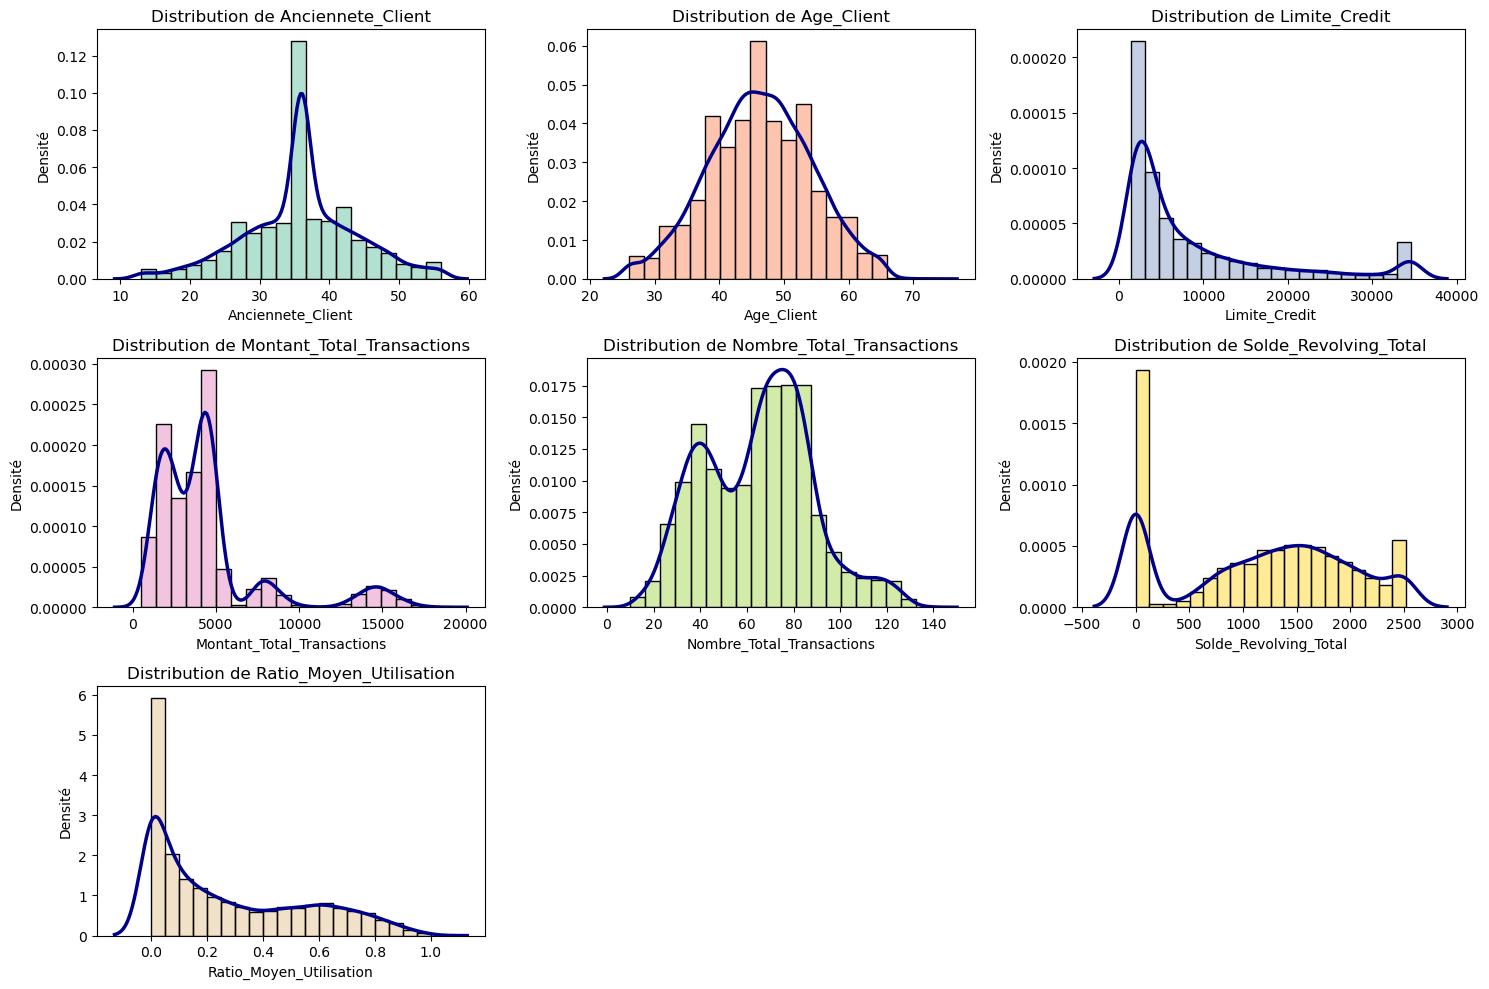

In [26]:
# Liste des variables numériques pour tracer des histogrammes
numerical_vars = ['Anciennete_Client', 'Age_Client', 'Limite_Credit', 'Montant_Total_Transactions', 
                  'Nombre_Total_Transactions', 'Solde_Revolving_Total', 'Ratio_Moyen_Utilisation']

# Liste des variables catégorielles pour les diagrammes en barres
categorical_vars = ['Indicateur_Attrition', 'Sexe_Client', 'Niveau_Education', 'Statut_Matrimonial', 'Categorie_Revenu']

# Palette de couleurs pour les histogrammes
colors = sns.color_palette("Set2", len(numerical_vars))

#  Histogrammes et densités correspondantes
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[var], bins=20, kde=True, color=colors[i-1], stat="density")
    sns.kdeplot(df[var], color="darkblue", linewidth=2.5)
    plt.title(f"Distribution de {var}", fontsize=12)
    plt.xlabel(var, fontsize=10)
    plt.ylabel("Densité", fontsize=10)
plt.tight_layout()
plt.show()

les variables **Anciennete_Client** et **Age_Client** présentent des caractéristiques qui s'apparentent à des distributions normales.

- **Ancienneté_Client** :

  
	•	Distribution centrée autour de 30 à 40 ans d’ancienneté.

	•	Cela suggère que la plupart des clients ont une fidélité moyenne à longue à la banque.

	•	Les clients très récents ou très anciens sont minoritaires.

- **Âge_Client** :

  
	•	Distribution presque normale, centrée autour de 40 à 50 ans.


	•	Les clients semblent majoritairement d’âge moyen, avec peu de clients très jeunes ou très âgés.


- **Limite_Crédit** :

  
	•	Fort déséquilibre, avec une majorité de clients ayant des limites de crédit relativement faibles.


	•	Quelques valeurs élevées (peut-être des outliers) apparaissent autour de 30 000 à 40 000.


- **Montant_Total_Transactions** :

  
	•	Bimodalité évidente : deux groupes dominants de clients dépensant autour de 5 000 et 10 000.


	•	Cela pourrait représenter différents segments de clients selon leur comportement financier.


- **Nombre_Total_Transactions** :

  
	•	Distribution également bimodale, avec des pics autour de 50 à 80 transactions.


	•	Cela pourrait refléter des comportements distincts : utilisateurs peu actifs vs actifs réguliers.


- **Solde_Revolving_Total** :

  
	•	Distribution très asymétrique avec un pic important autour de zéro.


	•	Cela pourrait indiquer que la plupart des clients ne portent pas de solde sur leur carte (peut-être des payeurs en totalité chaque mois).


- **Ratio_Moyen_Utilisation** :

  
	•	Distribution fortement concentrée autour de 0 (faible utilisation moyenne des limites de crédit).


	•	Une minorité semble utiliser leur crédit de manière plus intensive (> 0.5).


### 2.2) Variables catégorielles

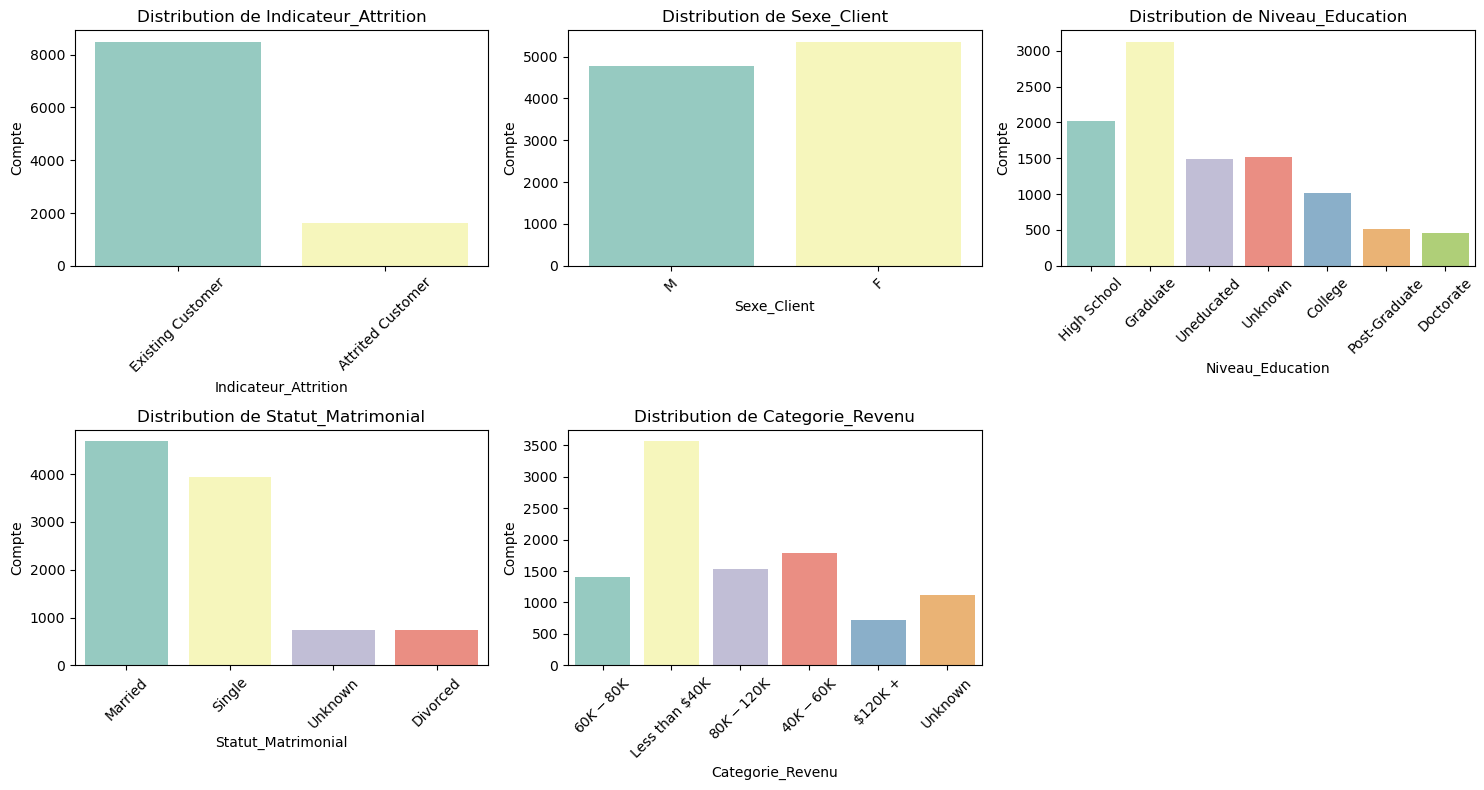

In [30]:
# Liste des variables catégorielles pour les diagrammes en barres
categorical_vars = ['Indicateur_Attrition', 'Sexe_Client', 'Niveau_Education', 'Statut_Matrimonial', 'Categorie_Revenu']

# Trace les diagrammes en barres pour les variables catégorielles
plt.figure(figsize=(15, 8))

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, i)

    # Obtenir le nombre de catégories uniques
    unique_categories = df[var].nunique()
    #   Palette de couleurs qui correspond au nombre de catégories
    bar_colors = sns.color_palette("Set3", n_colors=unique_categories)

    # Les diagrammes en barres en utilisant hue pour éviter les avertissements
    sns.countplot(data=df, x=var, palette=bar_colors, hue=df[var].astype(str), legend=False)  # Ajout de hue avec la variable comme string

    plt.title(f"Distribution de {var}", fontsize=12)
    plt.xlabel(var, fontsize=10)
    plt.ylabel("Compte", fontsize=10)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


- **Indicateur_Attrition** :

	• La majorité des clients (plus de 80 %) sont toujours actifs (“Existing Customers”), tandis qu’une minorité est partie (“Attrited Customers”).
    
- **Sexe_Client** :

	• Les proportions hommes (M) et femmes (F) sont presque équilibrées, avec une légère surreprésentation des femmes.
	
- **Niveau_Education** :

	•	La catégorie “Graduate” est la plus représentée, suivie de “High School” et “Unknown”. Les niveaux “Doctorate” et “Post-Graduate” sont les moins fréquents.
	
- **Statut_Matrimonial** :

  
	•	Les clients mariés sont les plus représentés, suivis des célibataires. Les statuts “Unknown” et “Divorced” sont minoritaires.
	
- **Categorie_Revenu** :

	• La majorité des clients se situe dans la tranche de revenu “Less than $40K”, suivie de “60K–80K” et “80K–120K”. La catégorie “Unknown” est minoritaire.
	

# III) Problème de censure 

## 1) Définition et présentation des différentes types de censure 

La variable de censure est une variable binaire qui identifie si l'événement étudié (dans notre cas la désertion d'un client) a été observé ou non pour un individu.

Il existe principalement trois types de censure :

**Censure à droite** : L'événement d'intérêt n'a pas encore eu lieu au moment où l'étude se termine. Par exemple, un client est encore actif à la fin de la période d'étude, donc le moment où il pourrait quitter la banque est inconnu.

**Censure à gauche** : On sait que l'événement s'est produit avant un certain temps, mais on ne connaît pas le moment exact.

**Censure par intervalle** : L'événement s'est produit dans un intervalle de temps, mais le moment précis reste inconnu.

Dans notre cas nous avons une **censure à droite**.


## 2) Création de la variable censure et Sexe_Client

Nous avons **83.9%** des clients qui n'ont pas quitté la banque et **16.1%** des clients qui ont quitté la banque. Les clients qui n'ont pas quitté la banque correspondent a nos données censurées. Nous avons donc crée une variables censurée qui prend pour valeur 0 si le client n'a pas quitté la banque et 1 s'il a quitté la banque. 

**0 pour la censure**

**1 pour la non censure**

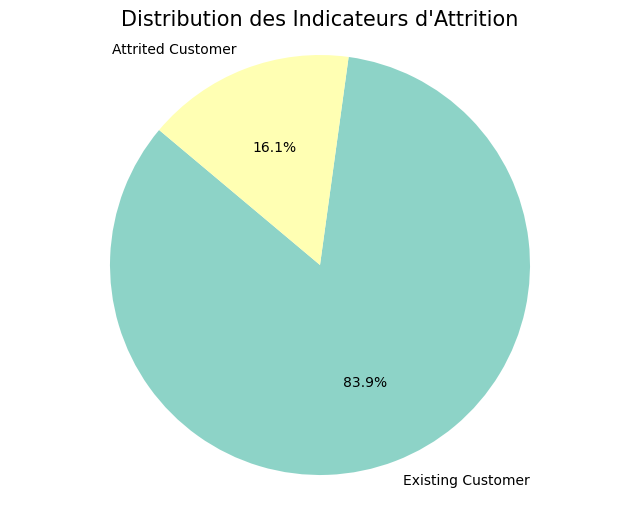

In [38]:
# Calculer les comptes et les pourcentages
attrition_counts = df['Indicateur_Attrition'].value_counts()
attrition_percentages = attrition_counts / attrition_counts.sum() * 100

# Création de la variable Censure
df['Censure'] = np.where(df['Indicateur_Attrition'] == 'Existing Customer', 0, 1)

# Recoder la variable Sexe_Client : F -> 0, M -> 1
df['Sexe_Client'] = df['Sexe_Client'].map({'F': 0, 'M': 1})
# Création du diagramme en cercle
plt.figure(figsize=(8, 6))
plt.pie(attrition_percentages, labels=attrition_percentages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))

# Titre du diagramme
plt.title('Distribution des Indicateurs d\'Attrition', fontsize=15)
plt.axis('equal')  # Pour s'assurer que le cercle est dessiné comme un cercle
plt.show()

# IV) Modélisation non parametrique

## 1) Définition des fonctions

| Estimateur | Formule | Description |
|:-----:|------------------------|------------------|
| $T$  |  | variable aléatoire associée au temps de survie.<br> Elle mesure le temps écoulé jusqu'à ce que le Client quitte la banque.<br>Dans notre cas la variable de temps sera **Anciennete_Client**|
| $S(t)$ | $$S(t)=P(T > t)$$ | Elle représente la probabilité qu'un client ne quitte pas la banque au-delà d’un instant t donné. Autrement dit, **elle mesure la riseque que le temps jusqu'au dépard d'un client soit supérieur à t**. <br>. |
| $h(t)$ | $$h(t) = \dfrac{f(t)} {S(t)}$$ | f(t)  est la densité de probabilité de  T  (la probabilité que  T  soit égal à  t ). <br>En d'autres termes,  **h(t)  représente la risque instantanée qu'un individu quitte la banque au mois t sachant qu'il est resté actif jusque là**. |
| $H(t)$ | $$H(t) = \int_0^t h(u) du = -ln(S(t))$$ | La fonction de hasard est l'intégrale de la fonction de risque  h(t) .<br>  **H(t)  représente le risque cumulatif des clients qui quittent la banque jusqu'au mois t**.|

## 2) Estimation des fonction : Kaplan Meier

### A) La fonction de survie S(t) 

| **Estimateur de la fonction de survie \( S(t) \)** | **Sans censure**                                      | **Avec censure**                                                  |
|-----------------------------------------------------|------------------------------------------------------|------------------------------------------------------------------|
| **Formule**                                         | $ \hat{S}(t) = \frac{n(t)}{n_0} $                  | $ \hat{S}(t) = \prod_{t_i \leq t} \left(1 - \frac{d_i}{n_i}\right) $ |
| **Description**                                     | Elle représente la probabilité qu'un client ne quitte pas la banque au-delà d’un instant $ t $ donné.      | Estimateur de Kaplan-Meier, tenant compte des individus censurés. |
| **Propriétés**                                      | - **Non biaisé**. <br> - **Consistant** pour grands échantillons. | - **Non biaisé** sous censure aléatoire. <br> - **Consistant** et **asymptotiquement normal**. |
| **Variance**                                        | Non applicable (formule simple).                     | Variance estimée par Greenwood : <br> $ \text{Var}(\hat{S}(t)) = \hat{S}(t)^2 \sum_{t_i \leq t} \frac{d_i}{n_i (n_i - d_i)} $ |


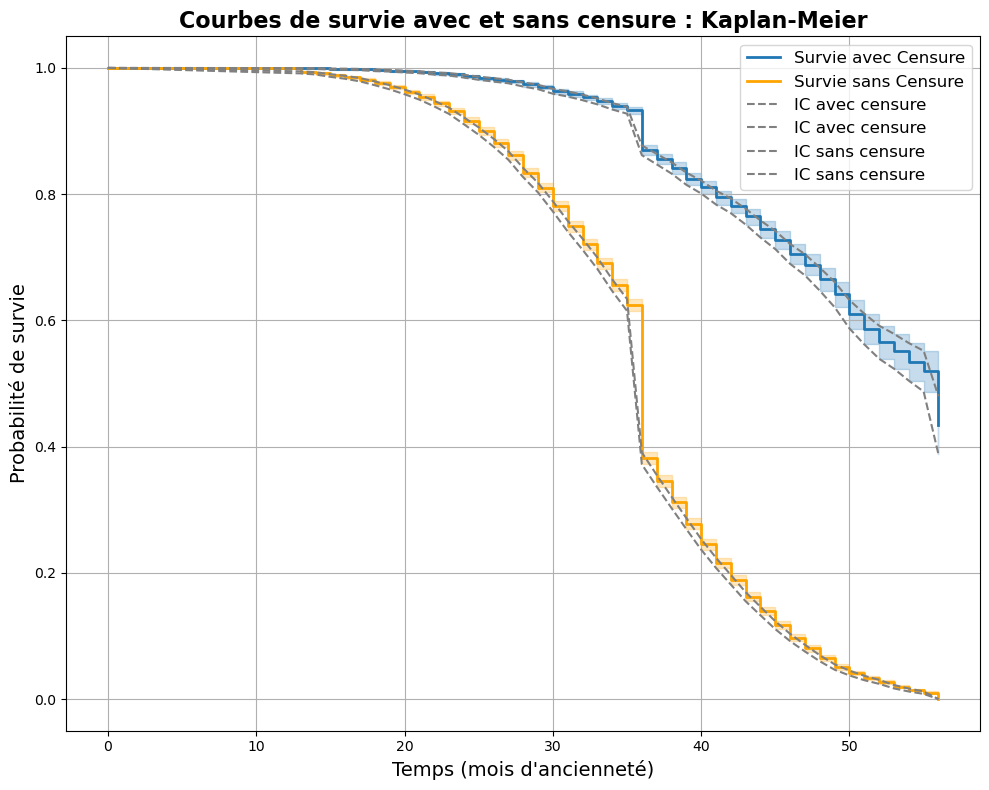

In [46]:
# Instancier le Kaplan-Meier Fitter pour les deux cas (avec et sans censure)
kmf_censure = KaplanMeierFitter()
kmf_nCensure = KaplanMeierFitter()
# Ajuster les modèles
kmf_censure.fit(durations=df['Anciennete_Client'], event_observed=df['Censure'])  # Avec censure
kmf_nCensure.fit(durations=df['Anciennete_Client'])  # Sans censure (ignorer les censures)

# Créer la figure et l'axe pour la courbe de survie
plt.figure(figsize=(10, 8))
ax = plt.subplot(111)

# Tracer la courbe de survie avec censure
kmf_censure.plot(ax=ax, ci_show=True, label='Survie avec Censure', linewidth=2)

# Tracer la courbe de survie sans censure
kmf_nCensure.plot(ax=ax, ci_show=True, color='orange', label='Survie sans Censure', linewidth=2)

confidence_interval_censure = kmf_censure.confidence_interval_
plt.plot(confidence_interval_censure, color='gray',linestyle='--', label="IC avec censure")
confidence_interval = kmf_nCensure.confidence_interval_
plt.plot(confidence_interval, color='grey',linestyle='--', label="IC sans censure")

# Titre et labels pour l'axe de la survie
plt.title("Courbes de survie avec et sans censure : Kaplan-Meier", fontsize=16, fontweight='bold')
plt.xlabel("Temps (mois d'ancienneté)", fontsize=14)
plt.ylabel("Probabilité de survie", fontsize=14)

# Ajouter une grille pour améliorer la lisibilité
plt.grid(True)

# Ajouter une légende pour différencier les deux courbes
plt.legend(loc='best', fontsize=12)

# Afficher la courbe
plt.tight_layout()
plt.show()


- La probabilité de survie diminue progressivement au fil du temps.
- Les courbes “avec censure” et “sans censure” sont similaires, mais la censure semble légèrement réduire l’incertitude des intervalles de confiance.
- **la chute observée autour de 37 mois** correspond à une proportion plus élevée de clients quittant la banque, car il y a simplement plus de clients dans cette tranche temporelle.
- La probabilité de survie avec censure est environ **10-15 %** plus élevée que celle sans censure à ce moment critique.

## Explication du pic dans notre fonction de survie

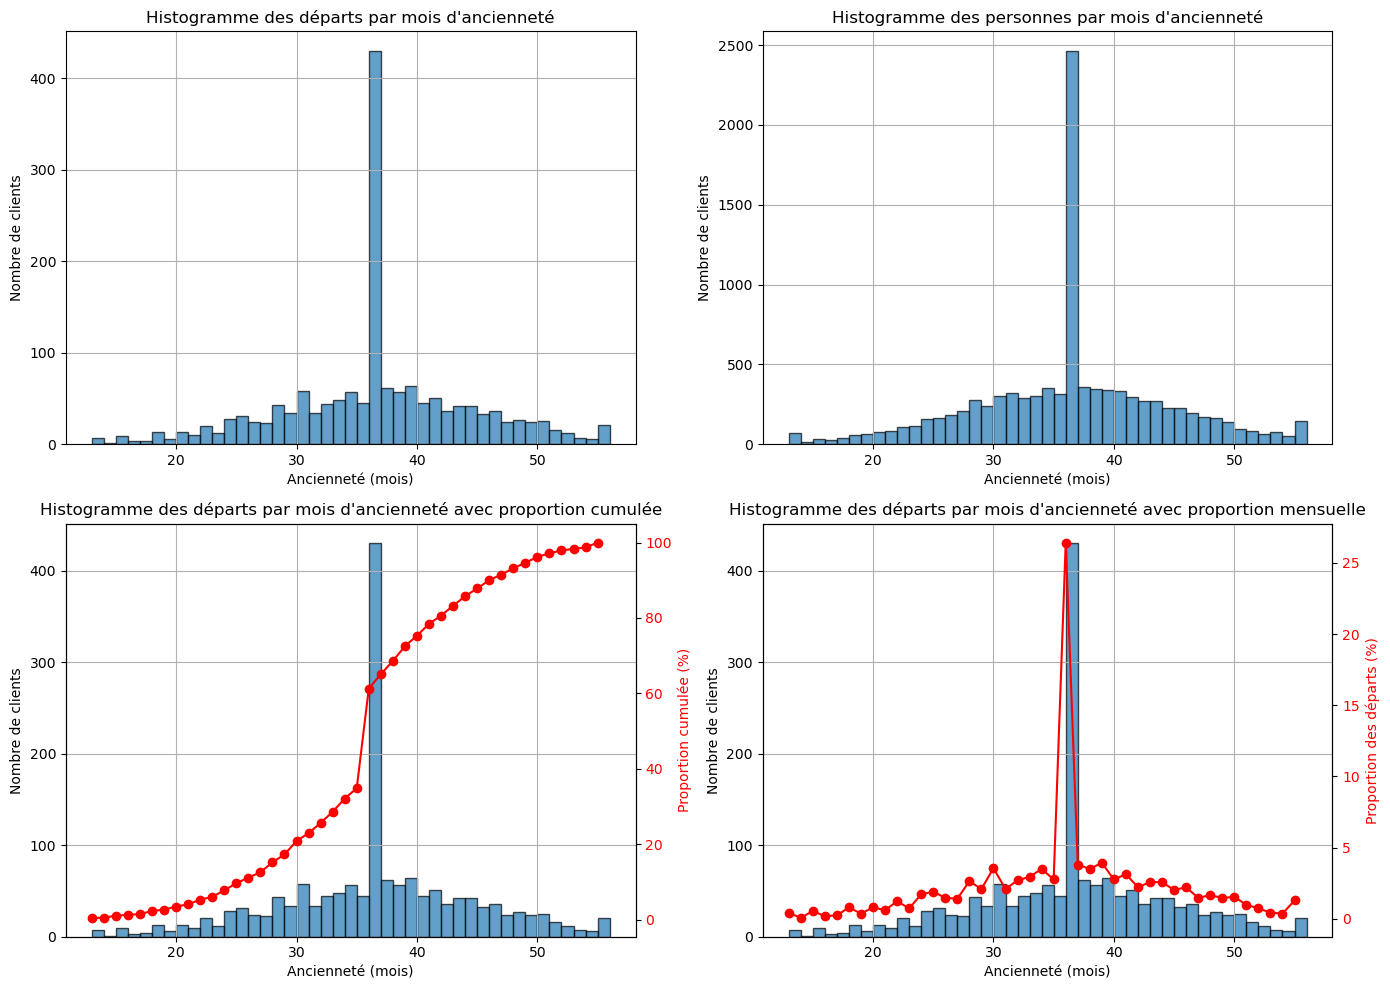

In [50]:
# Créer la figure et les sous-graphiques (2 lignes, 2 colonnes)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Graphique 1: Histogramme des départs par mois d'ancienneté
clients_desertes = df[df['Censure'] == 1]
axes[0, 0].hist(clients_desertes['Anciennete_Client'], bins=range(int(df['Anciennete_Client'].min()), int(df['Anciennete_Client'].max()) + 1), edgecolor='black', alpha=0.7)
axes[0, 0].set_title("Histogramme des départs par mois d'ancienneté")
axes[0, 0].set_xlabel("Ancienneté (mois)")
axes[0, 0].set_ylabel("Nombre de clients")
axes[0, 0].grid(True)

# Graphique 2: Histogramme des clients en fonction de l'ancienneté
clients_desertes = df
axes[0, 1].hist(clients_desertes['Anciennete_Client'], bins=range(int(df['Anciennete_Client'].min()), int(df['Anciennete_Client'].max()) + 1), edgecolor='black', alpha=0.7)
axes[0, 1].set_title("Histogramme des personnes par mois d'ancienneté")
axes[0, 1].set_xlabel("Ancienneté (mois)")
axes[0, 1].set_ylabel("Nombre de clients")
axes[0, 1].grid(True)

# Graphique 3: Histogramme avec proportion cumulée
clients_desertes = df[df['Censure'] == 1]
bins = range(int(df['Anciennete_Client'].min()), int(df['Anciennete_Client'].max()) + 1)
counts, edges, _ = axes[1, 0].hist(clients_desertes['Anciennete_Client'], bins=bins, edgecolor='black', alpha=0.7)
axes[1, 0].set_title("Histogramme des départs par mois d'ancienneté avec proportion cumulée")
axes[1, 0].set_xlabel("Ancienneté (mois)")
axes[1, 0].set_ylabel("Nombre de clients")
axes[1, 0].grid(True)

# Proportion cumulée
ax2 = axes[1, 0].twinx()
cumulative_proportion = np.cumsum(counts) / np.sum(counts) * 100
ax2.plot(edges[:-1], cumulative_proportion, color='red', marker='o', linestyle='-', label='Proportion cumulée')
ax2.set_ylabel("Proportion cumulée (%)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Graphique 4: Histogramme avec proportion mensuelle
clients_desertes = df[df['Censure'] == 1]
bins = range(int(df['Anciennete_Client'].min()), int(df['Anciennete_Client'].max()) + 1)
counts, edges, _ = axes[1, 1].hist(clients_desertes['Anciennete_Client'], bins=bins, edgecolor='black', alpha=0.7)
axes[1, 1].set_title("Histogramme des départs par mois d'ancienneté avec proportion mensuelle")
axes[1, 1].set_xlabel("Ancienneté (mois)")
axes[1, 1].set_ylabel("Nombre de clients")
axes[1, 1].grid(True)

# Proportion par mois
ax2 = axes[1, 1].twinx()
total_clients_desertes = len(clients_desertes)
proportion_par_mois = (counts / total_clients_desertes) * 100
ax2.plot(edges[:-1], proportion_par_mois, color='red', marker='o', linestyle='-', label='Proportion mensuelle')
ax2.set_ylabel("Proportion des départs (%)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Ajuster les espaces entre les sous-graphiques
plt.tight_layout()
plt.show()


- **À 37 mois**, le nombre de clients est le plus élevé, comme indiqué dans l’histogramme d’ancienneté. Cela signifie que beaucoup de clients atteignent cette ancienneté avant de décider de rester ou de partir.

### B) La fonction de risque cumulée H(t)

| **Estimateur de la fonction de risque cumulée \( H(t) \)** | **Sans censure**                                      | **Avec censure**                                                  |
|------------------------------------------------------------|------------------------------------------------------|------------------------------------------------------------------|
| **Formule**                                                | $ \hat{H}(t) = -\log(\hat{S}(t)) $, avec $ \hat{S}(t) = \frac{n(t)}{n_0} $ | $ \hat{H}(t) = \sum_{t_i \leq t} \frac{d_i}{n_i} $ (Estimateur de Nelson-Aalen) |
| **Description**                                            | H(t)  représente le risque cumulatif des clients qui quittent la banque jusqu'au mois t | Somme des ratios des événements observés $ d_i $ et du nombre à risque $ n_i $ à chaque instant $ t_i $, prenant en compte la censure. |
| **Propriétés**                                             | - **Non biaisé**. <br> - **Consistant** pour grands échantillons. | - **Non biaisé** sous censure aléatoire. <br> - **Consistant** et **asymptotiquement normal**. <br> - Tient compte des événements censurés. |
| **Variance**                                               | Non applicable.                                      | Variance estimée par : <br> $ \text{Var}(\hat{H}(t)) = \sum_{t_i \leq t} \frac{d_i}{n_i^2} $ |


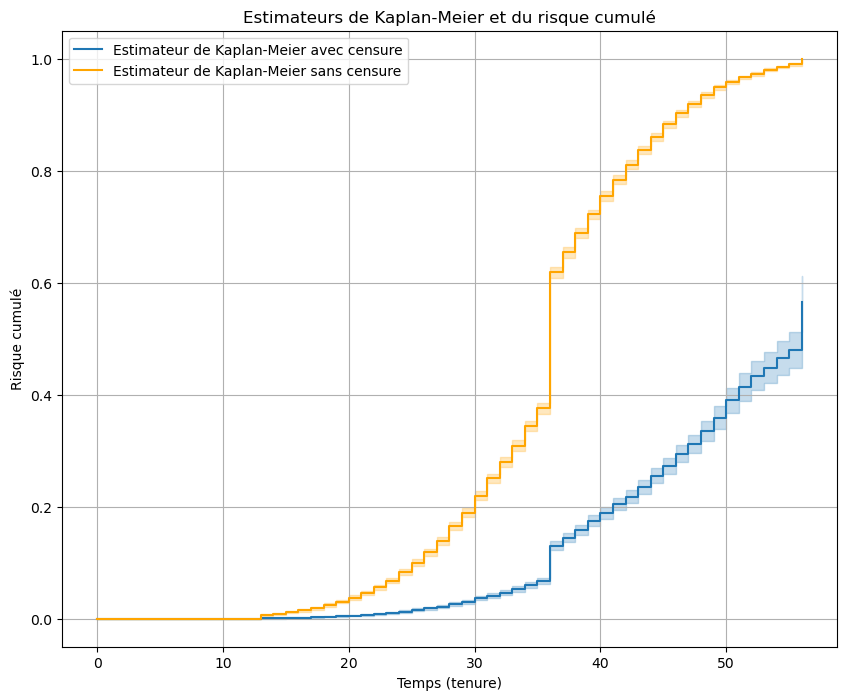

In [55]:
# Étape 3: Tracer les estimateurs de risque cumulé
plt.figure(figsize=(10, 8))

# Tracer l'estimateur de Kaplan-Meier
kmf_censure.plot_cumulative_density(ax=plt.gca(), label='Estimateur de Kaplan-Meier avec censure')
kmf_nCensure.plot_cumulative_density(ax=plt.gca(), label='Estimateur de Kaplan-Meier sans censure', color='orange')


# Ajouter des détails au graphique
plt.title("Estimateurs de Kaplan-Meier et du risque cumulé")
plt.xlabel("Temps (tenure)")
plt.ylabel("Risque cumulé")
plt.legend()
plt.grid(True)  # Ajouter une grille pour une meilleure lisibilité
plt.show()  # Afficher le graphique

- La période **35-40 mois** montre une forte divergence entre les deux courbes :
  
	•	Sans censure (orange) : Le risque cumulé augmente de manière très rapide, amplifiant l’effet des départs observés.

	•	Avec censure (bleue) : Bien qu’il y ait une augmentation, elle est moins brutale, car les clients censurés (actifs) réduisent l’impact des départs massifs.
- À **37 mois**, le nombre important de clients quittant la banque provoque une forte augmentation du risque cumulé dans la courbe sans censure.
- La courbe avec censure montre également une augmentation, mais elle est plus modérée, car elle répartit le risque sur l’ensemble de la population, y compris les clients encore fidèles.
- Période critique **(35-40 mois)** : La courbe sans censure surestime le risque d’environ **20-30 %**.
- Au-delà de **50 mois** : La différence diminue mais reste présente (environ **10-15 %**).

### C) la fonction taux de risque instantané h(t)

| **Estimateur de la fonction de taux de risque instantané \( h(t) \)** | **Sans censure**                                      | **Avec censure**                                                  |
|------------------------------------------------------------------------|------------------------------------------------------|------------------------------------------------------------------|
| **Formule**                                                            | $ \hat{h}(t) = \frac{d(t)}{n(t) \Delta t} $           | $ \hat{h}(t) = \frac{d_i}{n_i \Delta t} $                         |
| **Description**                                                        |La probabilité instantanée qu'un individu quitte la banque au cours du mois 𝑡, sous la condition qu'il soit encore client actif au début de ce même mois. | Taux de risque instantané calculé en tenant compte des données censurées. |
| **Propriétés**                                                         | - **Non biaisé**. <br> - **Consistant** pour grands échantillons. | - **Non biaisé** sous censure aléatoire. <br> - **Consistant** et **asymptotiquement normal**. |
| **Variance**                                                           | Non applicable.                                      | Variance estimée à partir des données censurées. |


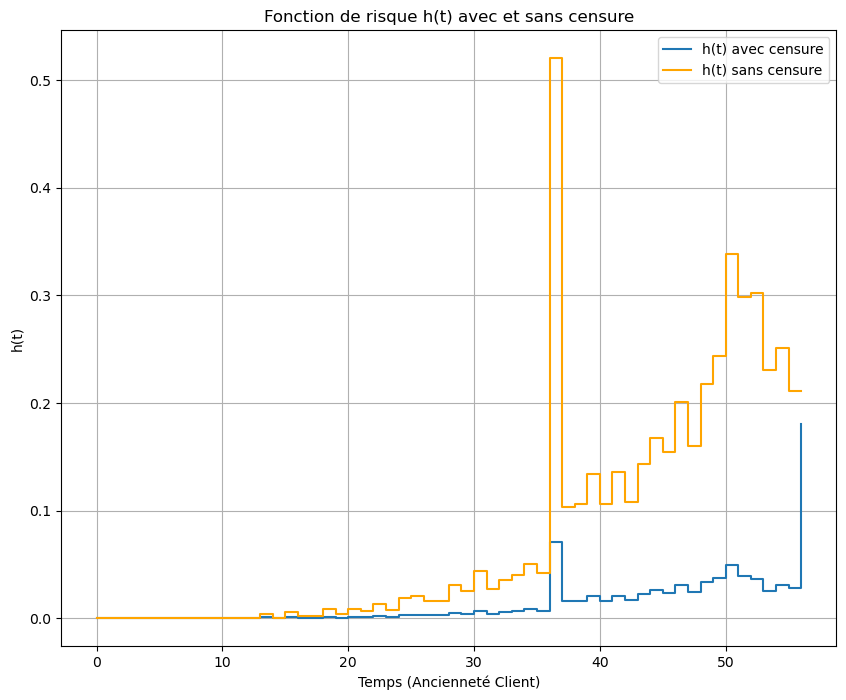

In [60]:
# Importer les bibliothèques nécessaire
# Calculer la fonction de risque h(t) avec censure
# h(t) est obtenu par la relation h(t) = -d/dt(log(S(t)))
# Ici, on prend le logarithme de la fonction de survie et on calcule la différence
hazard_est = (-np.log(kmf_censure.survival_function_)).diff().fillna(0)  # Estimation de la fonction de risque

# Étape 1: Filtrer les données pour n'inclure que les événements observés
observed_data = df[df['Censure'] == 1]

# Étape 2: Estimer la fonction de survie avec Kaplan-Meier sur les données observées
kmf_observed = KaplanMeierFitter()
kmf_observed.fit(durations=observed_data['Anciennete_Client'])

# Étape 3: Calculer la fonction de risque h(t) sans censure
hazard_est_no_censor = (-np.log(kmf_observed.survival_function_)).diff().fillna(0)  # Estimation de la fonction de risque

# Créer un graphique pour tracer les deux fonctions de risque
plt.figure(figsize=(10, 8))

# Tracer la fonction de risque avec censure
plt.step(kmf_observed.timeline, hazard_est.values, where="post", label='h(t) avec censure')

# Tracer la fonction de risque sans censure
plt.step(kmf_observed.timeline, hazard_est_no_censor.values, where="post", label='h(t) sans censure', color='orange')

# Ajouter des détails au graphique
plt.title("Fonction de risque h(t) avec et sans censure")  # Titre du graphique
plt.xlabel("Temps (Ancienneté Client)")  # Étiquette de l'axe X
plt.ylabel("h(t)")  # Étiquette de l'axe Y
plt.grid(True)  # Ajouter une grille pour une meilleure lisibilité
plt.legend()  # Ajouter une légende pour différencier les courbes
plt.show()  # Afficher le graphique


- Pour les deux courbes, le risque instantané reste faible dans les premiers mois **(0 à 30 mois)**, avec une augmentation progressive entre **30 et 35 mois**.
- La courbe sans censure (orange) montre un pic majeur de risque instantané à **37 mois**, correspondant à un grand nombre de clients quittant la banque à ce moment précis.
- La courbe avec censure (bleu) montre également une augmentation notable à **37 mois**, mais de manière plus modérée.la courbe sans censure surestime le risque instantané de **200-250 %**, ce qui reflète l’impact des départs massifs à ce moment.
- **Après 40 mois**, la courbe sans censure reste relativement élevée, tandis que la courbe avec censure diminue, reflétant une stabilisation du risque pour les clients restants.
- Après **50 mois**, la différence diminue, mais reste significative (environ **50-70 %**).

## 3) Estimateur de Nelson-Aalen 

### A) La fonction de risque cumulée H(t)

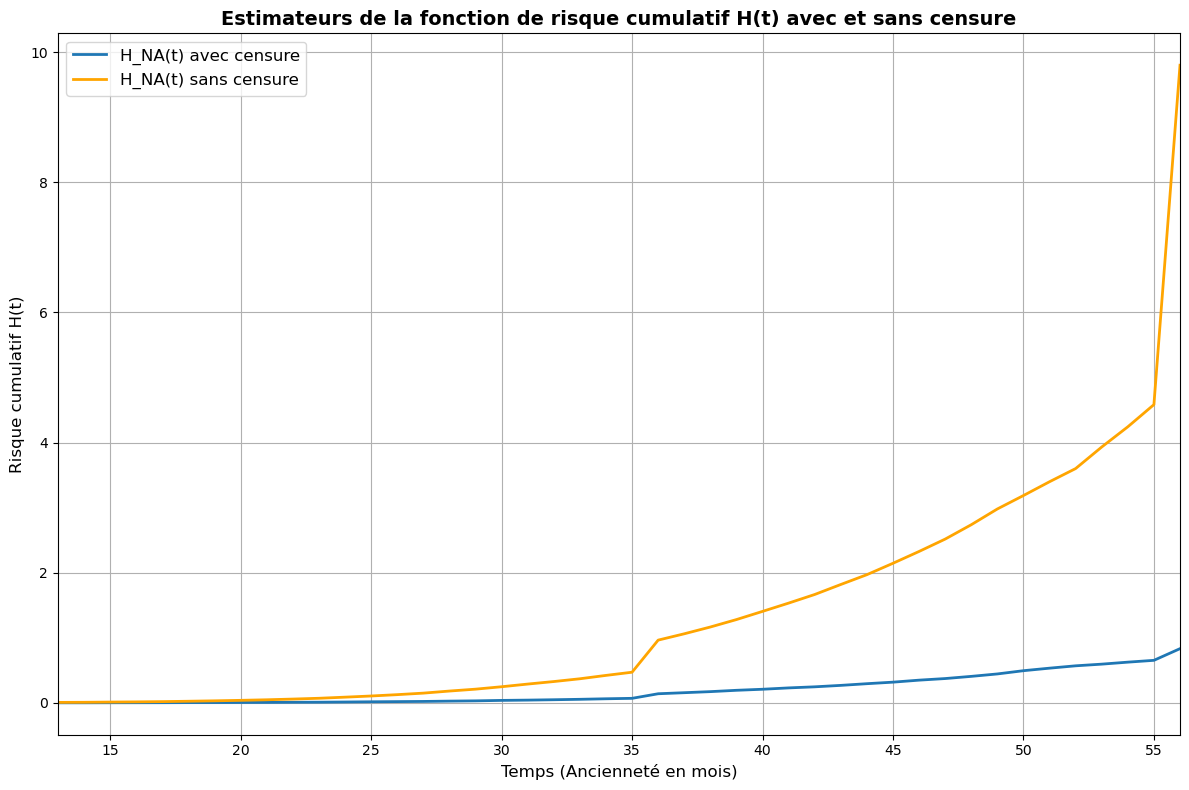

In [65]:
# Créer des objets NelsonAalenFitter pour les deux cas
naf_censure = NelsonAalenFitter()
naf_nCensure = NelsonAalenFitter()

# Ajuster les données au NelsonAalenFitter pour les cas avec et sans censure
naf_censure.fit(durations=df['Anciennete_Client'], event_observed=df['Censure'])  # Avec censure
naf_nCensure.fit(durations=df['Anciennete_Client'], event_observed=None)  # Sans censure

# Obtenir l'estimateur de H(t) pour les deux cas
risque_instantane_censure = naf_censure.cumulative_hazard_
risque_instantane_nCensure = naf_nCensure.cumulative_hazard_

# Obtenir les intervalles de confiance pour les données avec censure
confidence_interval_censure = naf_censure.confidence_interval_

# Tracer l'estimateur H(t) et l'intervalle de confiance
plt.figure(figsize=(12, 8))

# Tracer H(t) pour les données avec censure
plt.plot(risque_instantane_censure, label="H_NA(t) avec censure", linewidth=2)

# Tracer l'intervalle de confiance pour les données avec censure

# Tracer H(t) pour les données sans censure
plt.plot(risque_instantane_nCensure, label="H_NA(t) sans censure", color="orange", linewidth=2)

# Ajouter une légende, un titre et des labels aux axes
plt.legend(loc="upper left", fontsize=12)
plt.xlim(df['Anciennete_Client'].min(), df['Anciennete_Client'].max())
plt.title("Estimateurs de la fonction de risque cumulatif H(t) avec et sans censure", fontsize=14, fontweight='bold')
plt.xlabel("Temps (Ancienneté en mois)", fontsize=12)
plt.ylabel("Risque cumulatif H(t)", fontsize=12)

# Afficher la grille pour améliorer la lisibilité
plt.grid(True)

# Afficher le graphique avec ajustement des marges
plt.tight_layout()
plt.show()


- La divergence entre les deux courbes après 35 mois montre que les clients censurés (encore actifs) jouent un rôle important dans l’estimation du risque cumulé.
- La forte augmentation du risque cumulé dans la courbe sans censure reflète l’impact des départs massifs observés à 37 mois, déjà identifiés comme un moment clé du churn et **l’augmentation est plus progressive et lissée de la courbe avec censure**, car elle prend en compte les clients censurés (encore actifs)..
- Entre **35 et 40 mois** : Surestimation de **50-60 %** du risque par la courbe sans censure.
- Après **50 mois** : Différence réduite à **30-40 %**, mais toujours notable.

### B)  la fonction taux de risque instantané h(t)

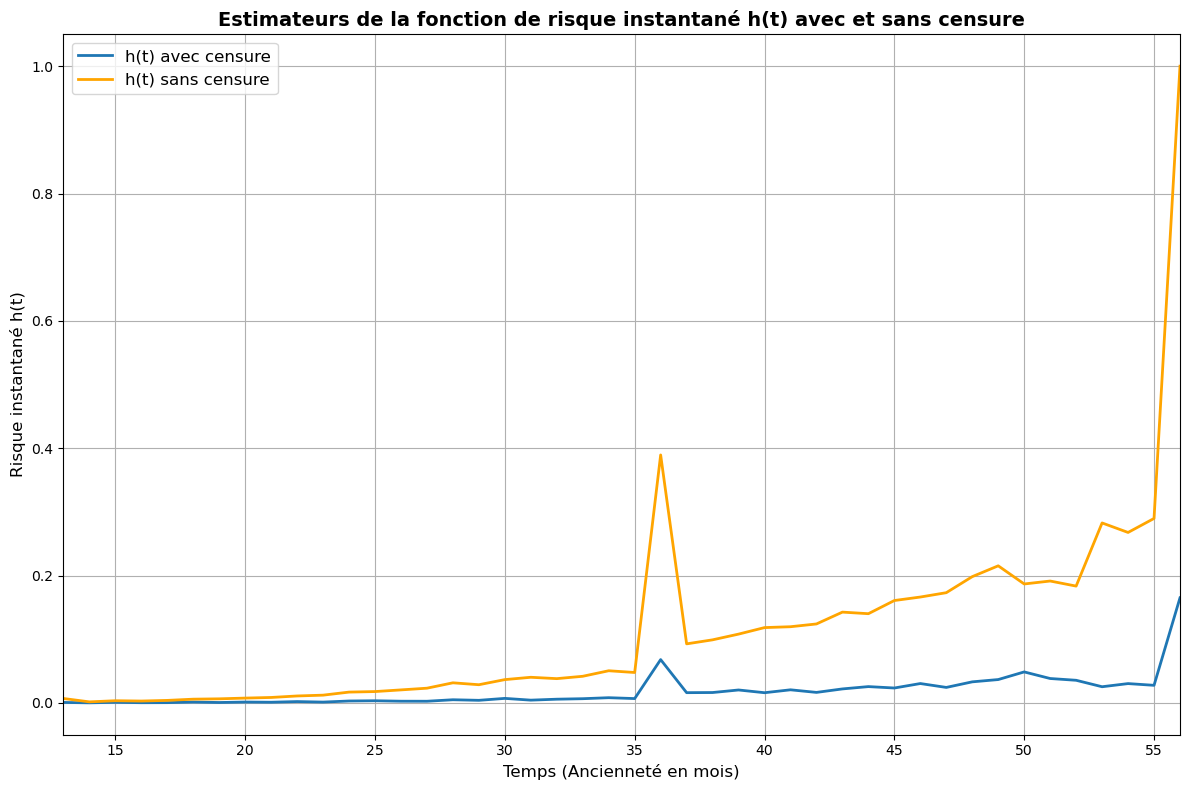

In [69]:


# Créer des objets NelsonAalenFitter pour les deux cas
naf_censure = NelsonAalenFitter()
naf_nCensure = NelsonAalenFitter()

# Ajuster les données au NelsonAalenFitter pour les cas avec et sans censure
naf_censure.fit(durations=df['Anciennete_Client'], event_observed=df['Censure'])  # Avec censure
naf_nCensure.fit(durations=df['Anciennete_Client'], event_observed=None)  # Sans censure

# Obtenir l'estimateur de H(t) pour les deux cas
risque_instantane_censure = naf_censure.cumulative_hazard_
risque_instantane_nCensure = naf_nCensure.cumulative_hazard_

# Calculer h(t) pour les données avec censure
h_t_censure = naf_censure.event_table['observed'] / naf_censure.event_table['at_risk']

# Calculer h(t) pour les données sans censure
h_t_nCensure = naf_nCensure.event_table['observed'] / naf_nCensure.event_table['at_risk']

# Tracer l'estimateur h(t)
plt.figure(figsize=(12, 8))

# Tracer h(t) pour les données avec censure
plt.plot(h_t_censure.index, h_t_censure, label="h(t) avec censure", linewidth=2)

# Tracer h(t) pour les données sans censure
plt.plot(h_t_nCensure.index, h_t_nCensure, label="h(t) sans censure", color="orange", linewidth=2)

# Ajouter une légende, un titre et des labels aux axes
plt.legend(loc="upper left", fontsize=12)
plt.xlim(df['Anciennete_Client'].min(), df['Anciennete_Client'].max())
plt.title("Estimateurs de la fonction de risque instantané h(t) avec et sans censure", fontsize=14, fontweight='bold')
plt.xlabel("Temps (Ancienneté en mois)", fontsize=12)
plt.ylabel("Risque instantané h(t)", fontsize=12)

# Afficher la grille pour améliorer la lisibilité
plt.grid(True)

# Afficher le graphique avec ajustement des marges
plt.tight_layout()
plt.show()


- Le pic marqué à 37 mois reflète un phénomène structurel où de nombreux clients décident de quitter la banque.
- La courbe sans censure met en évidence les périodes critiques avec des départs massifs, mais elle exagère les variations, car elle ignore les clients encore actifs.
- La courbe avec censure donne une image plus réaliste du risque instantané sur l’ensemble de la population.
- Le risque pour les clients restants **(après 40 mois)**  est modéré avec la censure, mais il augmente sensiblement sans censure, reflétant un phénomène de sélection où les clients les moins engagés partent progressivement.
- Avant **30 mois** : Différence négligeable (**<5 %**).
- Autour de **37 mois** : La courbe sans censure surestime le risque d’environ **300-400 %**, reflétant les départs massifs concentrés à ce moment.
- Après **50 mois** : L’écart diminue légèrement, mais reste significatif **(50-70 %)**.

### C) La fonction de survie S(t) 

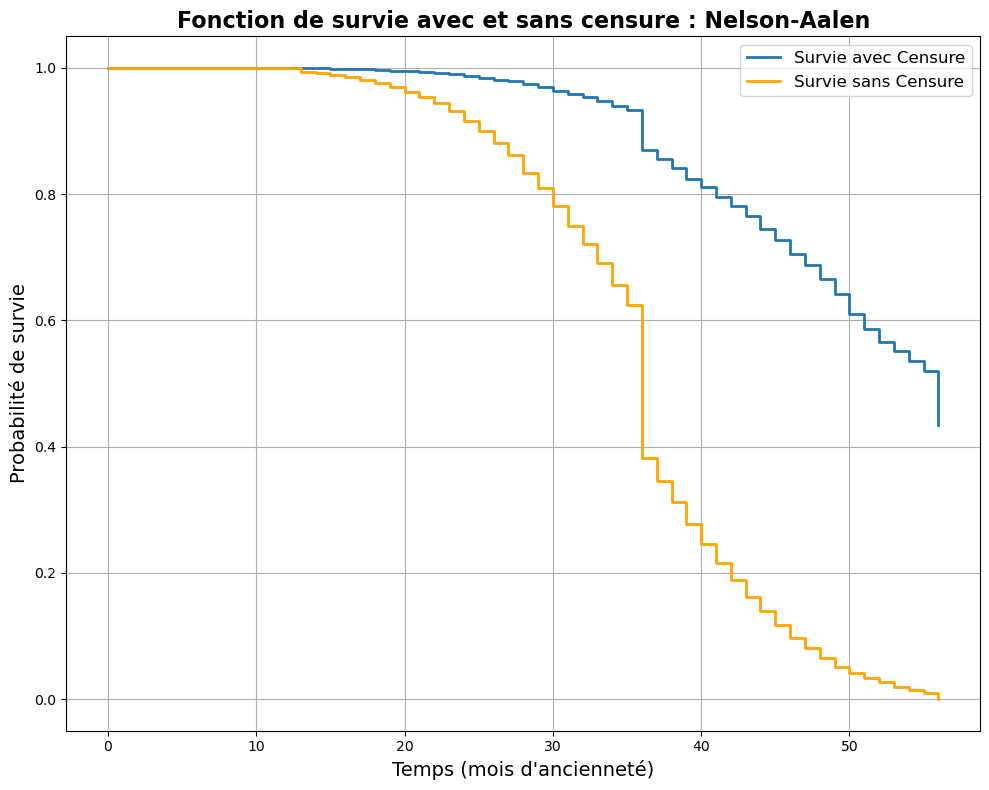

In [73]:
# Instancier le Nelson-Aalen Fitter pour les deux cas (avec et sans censure)
naf_censure = NelsonAalenFitter()
naf_nCensure = NelsonAalenFitter()

# Ajuster le modèle Nelson-Aalen pour les données avec censure
naf_censure.fit(durations=df['Anciennete_Client'], event_observed=df['Censure'], label='Risque cumulatif avec Censure')

# Ajuster le modèle Nelson-Aalen pour les données sans censure (en considérant que tous les événements sont observés)
naf_nCensure.fit(durations=df['Anciennete_Client'], event_observed=None, label='Risque cumulatif sans Censure')

# Calculer la fonction de survie à partir du risque cumulatif
# S(t) = exp(-H(t))

# Fonction de survie avec censure
S_t_censure = np.exp(-naf_censure.cumulative_hazard_)

# Fonction de survie sans censure
S_t_nCensure = np.exp(-naf_nCensure.cumulative_hazard_)

# Créer la figure et l'axe pour la courbe de survie
plt.figure(figsize=(10, 8))
ax = plt.subplot(111)

# Tracer la fonction de survie avec censure
ax.step(S_t_censure.index, S_t_censure['Risque cumulatif avec Censure'], where='post', label='Survie avec Censure', linewidth=2)

# Tracer la fonction de survie sans censure
ax.step(S_t_nCensure.index, S_t_nCensure['Risque cumulatif sans Censure'], where='post', label='Survie sans Censure', linewidth=2, color='orange')

# Titre et labels pour l'axe de la survie
plt.title("Fonction de survie avec et sans censure : Nelson-Aalen", fontsize=16, fontweight='bold')
plt.xlabel("Temps (mois d'ancienneté)", fontsize=14)
plt.ylabel("Probabilité de survie", fontsize=14)

# Ajouter une grille pour améliorer la lisibilité
plt.grid(True)

# Ajouter une légende pour différencier les deux courbes
plt.legend(loc='best', fontsize=12)

# Afficher la courbe
plt.tight_layout()
plt.show()


## 4) Comparaison des différents modèles

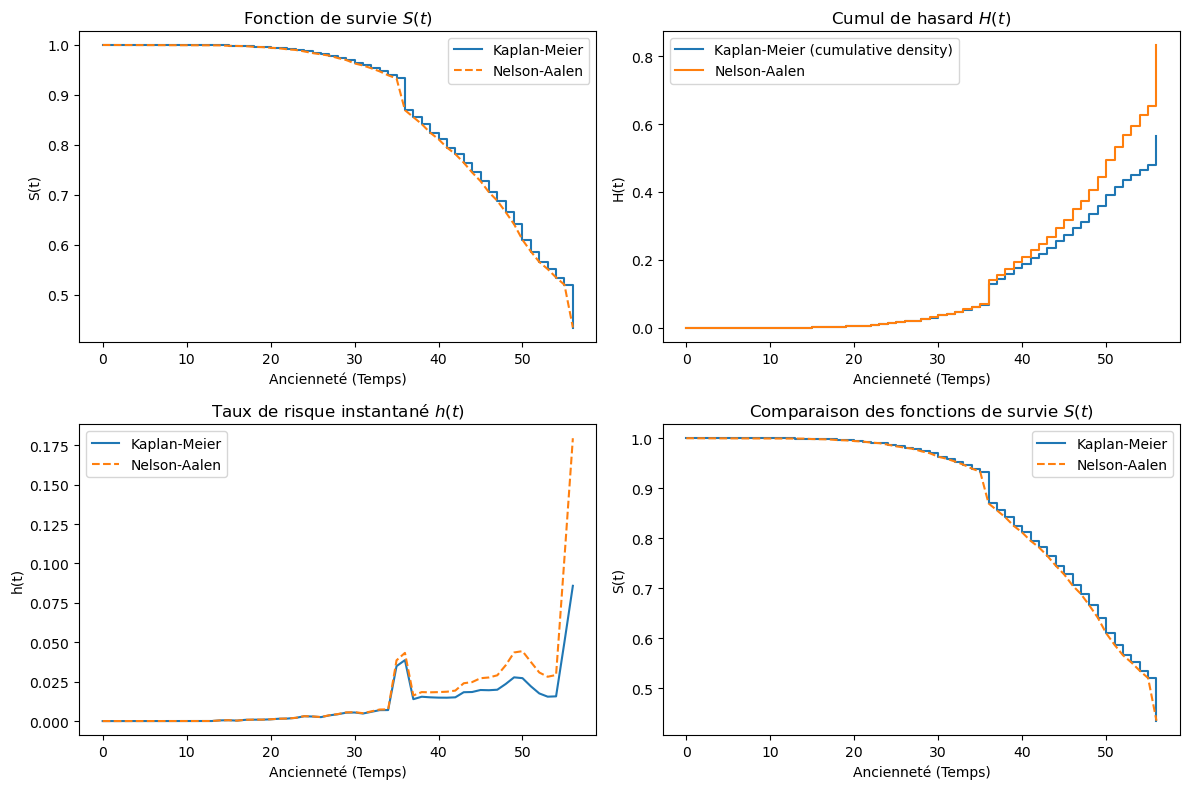

In [76]:
from lifelines import KaplanMeierFitter, NelsonAalenFitter

# Adapter les colonnes pour les variables 'Anciennete_Client' et 'Censure'
T = df['Anciennete_Client']  # Temps de survie (ancienneté)
C = df['Censure']            # Variable de censure (1 = événement observé, 0 = censuré)

# Estimation par Kaplan-Meier
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=C)

# Estimation par Nelson-Aalen
naf = NelsonAalenFitter()
naf.fit(T, event_observed=C)

# Afficher les courbes de survie
plt.figure(figsize=(12, 8))

# Fonction de survie Kaplan-Meier et Nelson-Aalen
plt.subplot(2, 2, 1)
kmf.plot_survival_function(ci_show=False, label='Kaplan-Meier')
plt.plot(naf.cumulative_hazard_.index, np.exp(-naf.cumulative_hazard_), label='Nelson-Aalen', linestyle="--")
plt.title("Fonction de survie $S(t)$")
plt.xlabel("Ancienneté (Temps)")
plt.ylabel("S(t)")
plt.legend()

# Fonction de cumul du risque H(t)
plt.subplot(2, 2, 2)
kmf.plot_cumulative_density(ci_show=False, label='Kaplan-Meier (cumulative density)')
naf.plot_cumulative_hazard(ci_show=False, label='Nelson-Aalen')
plt.title("Cumul de hasard $H(t)$")
plt.xlabel("Ancienneté (Temps)")
plt.ylabel("H(t)")
plt.legend()

# Taux de risque instantané h(t)
plt.subplot(2, 2, 3)
hazard_km = -np.gradient(kmf.survival_function_.values.flatten(), kmf.survival_function_.index)
hazard_na = np.gradient(naf.cumulative_hazard_.values.flatten(), naf.cumulative_hazard_.index)

plt.plot(kmf.survival_function_.index, hazard_km, label='Kaplan-Meier')
plt.plot(naf.cumulative_hazard_.index, hazard_na, label='Nelson-Aalen', linestyle="--")
plt.title("Taux de risque instantané $h(t)$")
plt.xlabel("Ancienneté (Temps)")
plt.ylabel("h(t)")
plt.legend()

# Superposition des deux estimateurs de survie pour comparaison
plt.subplot(2, 2, 4)
kmf.plot_survival_function(ci_show=False, label='Kaplan-Meier')
plt.plot(naf.cumulative_hazard_.index, np.exp(-naf.cumulative_hazard_), label='Nelson-Aalen', linestyle="--")
plt.title("Comparaison des fonctions de survie $S(t)$")
plt.xlabel("Ancienneté (Temps)")
plt.ylabel("S(t)")
plt.legend()

plt.tight_layout()
plt.show()


**Fonction de survie (S(t))** :

- Les deux modèles sont cohérents pour estimer la fonction de survie, mais Kaplan-Meier est généralement plus précis pour estimer  S(t) , car il est spécifiquement conçu pour cela.
- La méthode Nelson-Aalen tend à légèrement **sous-estimer la probabilité de survie** à mesure que le temps avance.

**Risque cumilé (H(t))** :

- Différence notable : Nelson-Aalen affiche un risque cumulé légèrement plus élevé, en particulier après 35 mois, et continue à croître rapidement.
- Cette différence reflète que Nelson-Aalen intègre les risques de manière plus continue, tandis que Kaplan-Meier segmente davantage les périodes de temps.

**Taux de risque instantané (h(t))** :

- Les courbes des deux modèles suivent des tendances similaires, avec des pics autour de 37 mois et une augmentation progressive après 50 mois.
- Kaplan-Meier (bleu) montre des variations plus abruptes, tandis que Nelson-Aalen (orange pointillé) produit une courbe plus lisse.


Les modèles Kaplan-Meier et Nelson-Aalen sont cohérents et complémentaires. Kaplan-Meier excelle pour estimer la survie  S(t) , tandis que Nelson-Aalen est plus adapté pour le risque cumulé  H(t)  et le risque instantané  h(t) .

# V) Modélisation parametrique sans covariable et avec ou sans censure

| **Loi**            | **Densité de probabilité**               | **Fonction de survie**                                             | **Description**                                                                                                                                      |
|--------------------|-------------------------------------------------------------|--------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------
| **Exponentielle**   | $ f(t) = \lambda e^{-\lambda t} $ | $ S(t) = e^{-\lambda t} $                                          | C'est une loi de survie caractérisée par un taux de risque constant. Utilisée principalement pour modéliser le temps entre des événements indépendants et exponentiels.  
| **Weibull**        | $ f(t) = \frac{k}{\lambda} \left(\frac{t}{\lambda}\right)^{k-1} e^{-\left(\frac{t}{\lambda}\right)^k} $ | $ S(t) = e^{-(t/\lambda)^k} $                                      | Modèle flexible pour des temps de survie, utile pour modéliser des taux de risque qui augmentent ou diminuent avec le temps. Les paramètres $ k $ et $ \lambda $ modifient la forme. |
| **Log-normale**    | $ f(t) = \frac{1}{t \sigma \sqrt{2\pi}} e^{-\frac{(\ln t - \mu)^2}{2\sigma^2}} $ | $ S(t) = 1 - \Phi\left(\frac{\ln t - \mu}{\sigma}\right) $         | Modèle souvent utilisé pour des données asymétriques positives, comme des revenus ou des tailles. La distribution est définie par les paramètres $ \mu $ et $ \sigma $.     |


## 1) Les modèles 

## A) Le modèle Exponentiel

## a) Avec censure 

In [84]:
from lifelines import ExponentialFitter, WeibullFitter, LogNormalFitter
import matplotlib.pyplot as plt

# Ajustement des modèles avec censure

# Exponentiel
exp_fitter = ExponentialFitter()
exp_fitter.fit(T, event_observed=C)
print("Résumé Exponentiel avec censure")
print(exp_fitter.summary)
# Calcul AIC et BIC avec censure
n = len(T)

# Exponentiel
AIC_exp_cens = exp_fitter.AIC_
BIC_exp_cens = len(exp_fitter.summary) * np.log(n) - 2 * exp_fitter.log_likelihood_
print(f"AIC Exponentiel avec censure: {AIC_exp_cens}, BIC Exponentiel avec censure: {BIC_exp_cens}")

Résumé Exponentiel avec censure
               coef  se(coef)  coef lower 95%  coef upper 95%  cmp to  \
lambda_  223.630567   5.54418      212.764174      234.496959     0.0   

                 z    p  -log2(p)  
lambda_  40.336096  0.0       inf  
AIC Exponentiel avec censure: 20860.125751925778, BIC Exponentiel avec censure: 20867.34871232911


## b) Sans censure

In [87]:
# Filtre les données sans censure (C = 1)
T_no_cens = T[C == 1] 
C_no_cens = C[C == 1]  

# Ajustement des modèles sans censure

# Exponentiel
exp_fitter_no_cens = ExponentialFitter()
exp_fitter_no_cens.fit(T_no_cens, event_observed=C_no_cens)
print("Résumé Exponentiel sans censure")
print(exp_fitter_no_cens.summary)

# Calcul AIC et BIC sans censure
n_no_cens = len(T_no_cens)

# Exponentiel
AIC_exp_no_cens = exp_fitter_no_cens.AIC_
BIC_exp_no_cens = len(exp_fitter_no_cens.summary) * np.log(n_no_cens) - 2 * exp_fitter_no_cens.log_likelihood_
print(f"AIC Exponentiel sans censure: {AIC_exp_no_cens}, BIC Exponentiel sans censure: {BIC_exp_no_cens}")

Résumé Exponentiel sans censure
              coef  se(coef)  coef lower 95%  coef upper 95%  cmp to  \
lambda_  36.178223  0.896919       34.420294       37.936152     0.0   

                z    p  -log2(p)  
lambda_  40.33611  0.0       inf  
AIC Exponentiel sans censure: 14932.841983575865, BIC Exponentiel sans censure: 14938.236476683083


## B) Le modèle Log-Normal

## a)  Avec censure

In [91]:

# Log-Normal
lognormal_fitter = LogNormalFitter()
lognormal_fitter.fit(T, event_observed=C)
print("Résumé Log-Normal avec censure")
print(lognormal_fitter.summary)

# Log-Normal (approximation)
AIC_lognormal_cens = lognormal_fitter.AIC_
BIC_lognormal_cens = len(lognormal_fitter.summary) * np.log(n) - 2 * lognormal_fitter.log_likelihood_
print(f"AIC Log-Normal avec censure: {AIC_lognormal_cens}, BIC Log-Normal avec censure: {BIC_lognormal_cens}")


Résumé Log-Normal avec censure
            coef  se(coef)  coef lower 95%  coef upper 95%  cmp to  \
mu_     4.012221  0.008771        3.995030        4.029412     0.0   
sigma_  0.351208  0.006326        0.338809        0.363606     1.0   

                 z    p  -log2(p)  
mu_     457.441969  0.0       inf  
sigma_ -102.561333  0.0       inf  
AIC Log-Normal avec censure: 17275.43934757915, BIC Log-Normal avec censure: 17289.885268385817


## b) Sans censure

In [94]:
# Log-Normal sans censure
lognormal_fitter_no_cens = LogNormalFitter()
lognormal_fitter_no_cens.fit(T_no_cens, event_observed=C_no_cens)
print("Résumé Log-Normal sans censure")
print(lognormal_fitter_no_cens.summary)

# Log-Normal (approximation sans censure)
AIC_lognormal_no_cens = lognormal_fitter_no_cens.AIC_
BIC_lognormal_no_cens = len(lognormal_fitter_no_cens.summary) * np.log(n_no_cens) - 2 * lognormal_fitter_no_cens.log_likelihood_
print(f"AIC Log-Normal sans censure: {AIC_lognormal_no_cens}, BIC Log-Normal sans censure: {BIC_lognormal_no_cens}")


Résumé Log-Normal sans censure
            coef  se(coef)  coef lower 95%  coef upper 95%  cmp to  \
mu_     3.562463  0.005879        3.550941        3.573986     0.0   
sigma_  0.237129  0.004157        0.228981        0.245276     1.0   

                 z    p  -log2(p)  
mu_     605.982443  0.0       inf  
sigma_ -183.516809  0.0       inf  
AIC Log-Normal sans censure: 11530.476286810219, BIC Log-Normal sans censure: 11541.265273024657


## C) Le modèle Weibull

## a) Avec censure

In [98]:
# Weibull
weibull_fitter = WeibullFitter()
weibull_fitter.fit(T, event_observed=C)
print("Résumé Weibull avec censure")
print(weibull_fitter.summary)

# Weibull
AIC_weibull_cens = weibull_fitter.AIC_
BIC_weibull_cens = len(weibull_fitter.summary) * np.log(n) - 2 * weibull_fitter.log_likelihood_
print(f"AIC Weibull avec censure: {AIC_weibull_cens}, BIC Weibull avec censure: {BIC_weibull_cens}")


Résumé Weibull avec censure
              coef  se(coef)  coef lower 95%  coef upper 95%  cmp to  \
lambda_  56.047764  0.389121        55.28510       56.810428     1.0   
rho_      5.096390  0.094364         4.91144        5.281341     1.0   

                  z    p  -log2(p)  
lambda_  141.466820  0.0       inf  
rho_      43.410526  0.0       inf  
AIC Weibull avec censure: 17241.53487136317, BIC Weibull avec censure: 17255.980792169834


## b) Sans censure

In [101]:
# Weibull
weibull_fitter_no_cens = WeibullFitter()
weibull_fitter_no_cens.fit(T_no_cens, event_observed=C_no_cens)
print("Résumé Weibull sans censure")
print(weibull_fitter_no_cens.summary)

# Weibull
AIC_weibull_no_cens = weibull_fitter_no_cens.AIC_
BIC_weibull_no_cens = len(weibull_fitter_no_cens.summary) * np.log(n_no_cens) - 2 * weibull_fitter_no_cens.log_likelihood_
print(f"AIC Weibull sans censure: {AIC_weibull_no_cens}, BIC Weibull sans censure: {BIC_weibull_no_cens}")

Résumé Weibull sans censure
              coef  se(coef)  coef lower 95%  coef upper 95%  cmp to  \
lambda_  39.260700  0.200286       38.868146       39.653254     1.0   
rho_      5.127452  0.095586        4.940107        5.314797     1.0   

                  z    p  -log2(p)  
lambda_  191.029922  0.0       inf  
rho_      43.180447  0.0       inf  
AIC Weibull sans censure: 11329.205390020263, BIC Weibull sans censure: 11339.994376234701


## 2) Test de conformité de Kolmogorov-Smirnov et de Cramér-von Mises.

### 2.1) Test de Kolmogorov-Smirnov (KS)

####  Explication générale
- **Statistique de test D** : La statistique **D** mesure la plus grande différence entre la fonction de répartition empirique des données (observée) et la fonction de répartition théorique du modèle testé.
  - **Plus D est grande**, plus il y a de preuves contre l’ajustement des données au modèle testé.
  - Si la p-value associée à D est **inférieure à un seuil de signification** (souvent 0.05), on rejette l'hypothèse nulle selon laquelle les données suivent ce modèle.

#### Hypothèses du test de KS
- **H₀ (hypothèse nulle)** : Les données suivent la distribution du modèle testé.
- **H₁ (hypothèse alternative)** : Les données ne suivent pas la distribution du modèle testé.

#### Interprétation des résultats
- **Zone d'acceptation** : Si p-value ≥ 0.05, on **accepte H₀** (les données suivent le modèle).
- **Zone de rejet** : Si p-value < 0.05, on **rejette H₀** (les données ne suivent pas le modèle).



### 2.2) Test de Cramér-von Mises (CvM)

#### Explication générale
- **Statistique de test W²** : La statistique **W²** mesure l'écart quadratique entre la fonction de répartition empirique et celle du modèle théorique.
  - **Plus W² est grande**, plus il y a de preuves contre l'ajustement des données au modèle.
  - Si la p-value associée à W² est **inférieure à un seuil de signification**, cela indique que le modèle ne s’ajuste pas bien aux données.

#### Hypothèses du test de CvM
- **H₀ (hypothèse nulle)** : Les données suivent la distribution du modèle testé.
- **H₁ (hypothèse alternative)** : Les données ne suivent pas la distribution du modèle testé.

#### Interprétation des résultats
- **Zone d'acceptation** : Si p-value ≥ 0.05, on **accepte H₀** (les données suivent le modèle).
- **Zone de rejet** : Si p-value < 0.05, on **rejette H₀** (les données ne suivent pas le modèle).



### 2.3) Synthèse des résultats

**Test KS (Kolmogorov-Smirnov)**
- La statistique **D** permet d'évaluer la différence entre la fonction de répartition empirique et celle du modèle testé. Une statistique D élevée et une p-value faible indiquent un mauvais ajustement du modèle aux données.

**Test CvM (Cramér-von Mises)**
- La statistique **W²** mesure l'écart quadratique entre les fonctions de répartition empirique et théorique. Une statistique W² élevée et une p-value faible suggèrent que le modèle ne s'ajuste pas bien aux données.


In [146]:
import numpy as np
import pandas as pd
from scipy.stats import expon, weibull_min, lognorm, ks_2samp
from scipy.stats import cramervonmises_2samp  # Import pour le test CVM
n = len(T)
events = T[C == 1]  # Sélectionner uniquement les événements observés

# Modèle exponentiel
params_exp = expon.fit(events, floc=0)  # Forçons loc=0 pour un modèle de survie

# Modèle Weibull
params_weibull = weibull_min.fit(events, floc=0)  # Forçons loc=0


# Modèle Log-Normal
params_lognorm = lognorm.fit(events, floc=0)  # Forçons loc=0


# Simulation de données selon chaque modèle ajusté
simulated_exp = expon.rvs(*params_exp, size=n)
simulated_weibull = weibull_min.rvs(*params_weibull, size=n)
simulated_lognorm = lognorm.rvs(*params_lognorm, size=n)

# Effectuer le test KS pour chaque modèle
ks_exp = ks_2samp(events, simulated_exp)
ks_weibull = ks_2samp(events, simulated_weibull)
ks_lognorm = ks_2samp(events, simulated_lognorm)

# Affichage des résultats du test KS
print("\nTest de Kolmogorov-Smirnov pour chaque modèle:")
print(f"Exponential: statistic = {ks_exp.statistic}, p-value = {ks_exp.pvalue}")
print(f"Weibull: statistic = {ks_weibull.statistic}, p-value = {ks_weibull.pvalue}")
print(f"Log-Normal: statistic = {ks_lognorm.statistic}, p-value = {ks_lognorm.pvalue}")

# Test Cramér-von Mises pour chaque modèle
# Effectuer le test CVM pour chaque modèle
cvm_exp = cramervonmises_2samp(events, simulated_exp)
cvm_weibull = cramervonmises_2samp(events, simulated_weibull)
cvm_lognorm = cramervonmises_2samp(events, simulated_lognorm)

# Affichage des résultats du test CVM
print("\nTest de Cramér-von Mises pour chaque modèle:")
print(f"Exponential: statistic = {cvm_exp.statistic}, p-value = {cvm_exp.pvalue}")
print(f"Weibull: statistic = {cvm_weibull.statistic}, p-value = {cvm_weibull.pvalue}")
print(f"Log-Normal: statistic = {cvm_lognorm.statistic}, p-value = {cvm_lognorm.pvalue}")



Test de Kolmogorov-Smirnov pour chaque modèle:
Exponential: statistic = 0.06256830601092896, p-value = 0.3604492705877376
Weibull: statistic = 0.046863387978142074, p-value = 0.718556365650543
Log-Normal: statistic = 0.09278688524590165, p-value = 0.048487360843070565

Test de Cramér-von Mises pour chaque modèle:
Exponential: statistic = 0.15943859715545727, p-value = 0.3626051068081151
Weibull: statistic = 0.06137001981349499, p-value = 0.8069758045815506
Log-Normal: statistic = 0.38309147010943434, p-value = 0.08013593824802301


### Tableau avec les differents indicateurs

| Model       |        AIC |        BIC |         KS Statistic | KS p-value |    CVM Statistic | CVM p-value |
|:------------|-----------:|-----------:|---------------------:|------------:|-----------------:|-------------:|
| Exponential | 14934.841984 | 14949.287904 | 0.41947415335988936 | 4.538482015405698e-224 | 84.94939176741025 | 2.5285893046067542e-08 |
| <span style="color: green;">Weibull</span>     | <span style="color: green;">11331.205390</span> | <span style="color: green;">11352.874271</span> | <span style="color: green;">0.1429511461355354</span> | <span style="color: green;">1.8370251545088531e-25</span> | <span style="color: green;">5.233544820713178</span> | <span style="color: green;">1.1788958698133456e-10</span> |
| Log-Normal  | 11532.476287 | 11554.145168 | 0.1862150322132033 | 4.950451593687497e-43 | 7.047564866314929 | 2.2310275848980154e-10 |

Les résultats montrent que le modèle Weibull est le meilleur selon les critères AIC et BIC. Tous les modèles (Exponential, Weibull, Log-Normal) ont des p-values extrêmement faibles dans les tests de Kolmogorov-Smirnov et Cramér-von Mises, indiquant que les données observées ne suivent pas parfaitement les distributions ajustées. Toutefois, le modèle Weibull présente les meilleures statistiques parmi les trois. Les tests suggèrent que, bien que le modèle Weibull soit optimal selon les critères AIC et BIC, il y a une certaine inadéquation avec les données.

### 2.4) QQPLOT

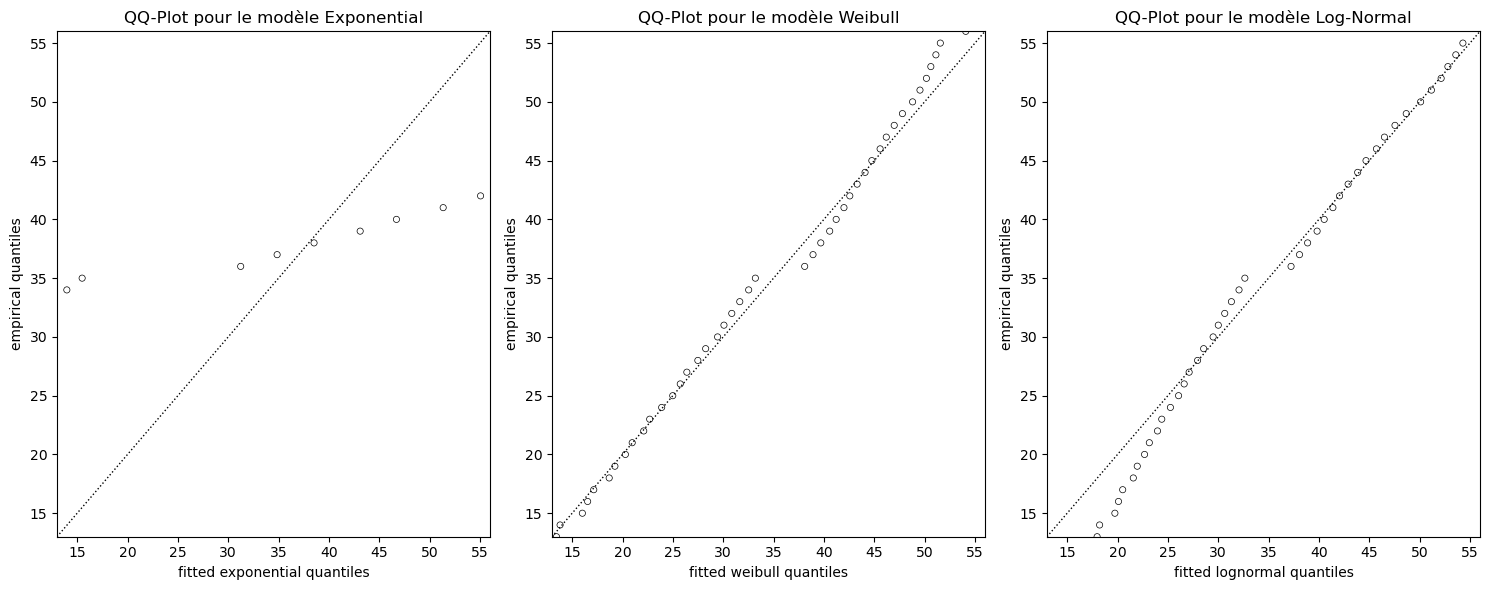

In [276]:
from lifelines import ExponentialFitter, WeibullFitter, LogNormalFitter
from lifelines.plotting import qq_plot
import matplotlib.pyplot as plt

# Ajustement des modèles
exp_fitter = ExponentialFitter().fit(T, event_observed=C)
weibull_fitter = WeibullFitter().fit(T, event_observed=C)
lognormal_fitter = LogNormalFitter().fit(T, event_observed=C)

# Liste des modèles et leurs noms
models = [exp_fitter, weibull_fitter, lognormal_fitter]
model_names = ["Exponential", "Weibull", "Log-Normal"]

# Tracé des QQ-Plots
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

for i, model in enumerate(models):
    qq_plot(model, ax=axes[i])
    axes[i].set_title(f"QQ-Plot pour le modèle {model_names[i]}")

plt.tight_layout()
plt.show()

Le resultat obtenu du QQ-Plot etait prévisible car à travers l'allure de notre courbe de la
foonction de survie on devais s'attendre à ce qu'un seul modèle ne soit ajuster à nos données.

**Nous avons donc procésser à un modèle mix c'est à dire la prémiere partie qui peut potentiellemnt suivre
une weibull et la deuxieme partie une Log-Normal.**

In [127]:
import numpy as np
import pandas as pd
from scipy.stats import weibull_min, lognorm
from scipy.optimize import minimize

# Chargement des données (remplacez 'df' par votre DataFrame)
T = df['Anciennete_Client']  # Temps de survie (ancienneté)
C = df['Censure']            # Variable de censure (1 = événement observé, 0 = censuré)
n = len(T)
events = T[C == 1]  # Sélectionner uniquement les événements observés

# Fonction de log-vraisemblance pour le modèle mixture
def log_likelihood_mixture(params):
    p, c_weibull, scale_weibull, mean_lognorm, sigma_lognorm = params
    
    # Vérifier que les paramètres sont valides
    if sigma_lognorm <= 0 or scale_weibull <= 0:
        return np.inf  # Retourner une grande valeur pour les paramètres invalides

    # Probabilité de la Weibull
    f_weibull = weibull_min.pdf(events, c_weibull, scale=scale_weibull)

    # Probabilité de la Log-Normale (limiter exp pour éviter les débordements)
    try:
        f_lognorm = lognorm.pdf(events, sigma_lognorm, scale=np.exp(np.clip(mean_lognorm, -20, 20)))
    except Exception:
        return np.inf  # Retourner une grande valeur en cas de problème

    # Mélange des deux distributions
    f_mixture = p * f_weibull + (1 - p) * f_lognorm
    # Log-vraisemblance
    return -np.sum(np.log(f_mixture + 1e-8))  # Ajout de 1e-8 pour éviter les log(0)

# Contraintes pour p entre 0 et 1, et pour les paramètres positifs
constraints = [
    {'type': 'ineq', 'fun': lambda x: x[0]},       # p >= 0
    {'type': 'ineq', 'fun': lambda x: 1 - x[0]},  # p <= 1
    {'type': 'ineq', 'fun': lambda x: x[2]},      # scale_weibull > 0
    {'type': 'ineq', 'fun': lambda x: x[4]}       # sigma_lognorm > 0
]

# Initialisation des paramètres (p, c_weibull, scale_weibull, mean_lognorm, sigma_lognorm)
init_params = [0.5, 1.5, 30, 3.0, 1.0]

# Optimisation pour ajuster le modèle
result = minimize(
    log_likelihood_mixture, 
    init_params, 
    constraints=constraints, 
    method='SLSQP', 
    options={'disp': True}
)

# Extraction des paramètres optimisés
if result.success:
    p, c_weibull, scale_weibull, mean_lognorm, sigma_lognorm = result.x
    mixture_results_df = pd.DataFrame({
        "Proportion Weibull (p)": [p],
        "Shape Weibull (c)": [c_weibull],
        "Scale Weibull": [scale_weibull],
        "Mean Log-Normal (log)": [mean_lognorm],
        "Sigma Log-Normal": [sigma_lognorm],
        "Log-Likelihood": [-result.fun]
    })
    print("Résultats du Modèle Mixture Weibull + Log-Normal :")
    print(mixture_results_df)
else:
    print("L'optimisation a échoué :", result.message)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 5620.2926295856105
            Iterations: 40
            Function evaluations: 267
            Gradient evaluations: 40
Résultats du Modèle Mixture Weibull + Log-Normal :
   Proportion Weibull (p)  Shape Weibull (c)  Scale Weibull  \
0                0.277554           4.889057      31.503902   

   Mean Log-Normal (log)  Sigma Log-Normal  Log-Likelihood  
0                3.65137          0.154089     -5620.29263  


In [150]:
# Simuler des données avec le modèle mixture ajusté
simulated_weibull = weibull_min.rvs(c_weibull, scale=scale_weibull, size=int(p * n))
simulated_lognorm = lognorm.rvs(sigma_lognorm, scale=np.exp(mean_lognorm), size=int((1 - p) * n))
simulated_mixture = np.concatenate([simulated_weibull, simulated_lognorm])

# Test KS entre données observées et données simulées
ks_statistic, p_value = ks_2samp(events, simulated_mixture)

print("Test de Kolmogorov-Smirnov (KS) :")
print(f"Statistique KS : {ks_statistic}")
print(f"P-valeur : {p_value}")

Test de Kolmogorov-Smirnov (KS) :
Statistique KS : 0.037311475409836065
P-valeur : 0.9159710187228551


In [152]:
# Test CVM entre données observées et données simulées
cvm_result = cramervonmises_2samp(events, simulated_mixture)

print("Test de Cramér-von Mises (CVM) :")
print(f"Statistique CVM : {cvm_result.statistic}")
print(f"P-valeur : {cvm_result.pvalue}")

Test de Cramér-von Mises (CVM) :
Statistique CVM : 0.05142203965220915
P-valeur : 0.8692167412673637


In [134]:
# Modèle Weibull
params_weibull = weibull_min.fit(events, floc=0)
log_likelihood_weibull = np.sum(np.log(weibull_min.pdf(events, *params_weibull)))
aic_weibull = 2 * 2 - 2 * log_likelihood_weibull
bic_weibull = 2 * np.log(n) - 2 * log_likelihood_weibull

# Modèle Log-Normal
params_lognorm = lognorm.fit(events, floc=0)
log_likelihood_lognorm = np.sum(np.log(lognorm.pdf(events, *params_lognorm)))
aic_lognorm = 2 * 2 - 2 * log_likelihood_lognorm
bic_lognorm = 2 * np.log(n) - 2 * log_likelihood_lognorm

# Modèle Mixture
k_mixture = 5  # Nombre de paramètres du modèle mixture
log_likelihood_mixture = -result.fun
aic_mixture = 2 * k_mixture - 2 * log_likelihood_mixture
bic_mixture = k_mixture * np.log(n) - 2 * log_likelihood_mixture

# Comparaison des métriques
comparison_df = pd.DataFrame({
    "Modèle": ["Weibull", "Log-Normale", "Mixture"],
    "Log-Likelihood": [log_likelihood_weibull, log_likelihood_lognorm, log_likelihood_mixture],
    "AIC": [aic_weibull, aic_lognorm, aic_mixture],
    "BIC": [bic_weibull, bic_lognorm, bic_mixture]
})

print(comparison_df)

        Modèle  Log-Likelihood           AIC           BIC
0      Weibull    -5662.602695  11329.205390  11343.651311
1  Log-Normale    -5763.238143  11530.476287  11544.922208
2      Mixture    -5620.292630  11250.585259  11286.700061


## 3) Estimation la méthode du maximum de vraisemblance (EMV)

### b. Log-vraisemblance avec censure

La log-vraisemblance à maximiser, basée sur un échantillon \(\{t_1, t_2, \ldots, t_n\}\), s'écrit :

$$
\mathcal{L}(t_1, \ldots, t_n; \mu, \sigma) = \sum_{i=1}^n \left[ -\log(t_i) - \log(\sigma \sqrt{2\pi}) - \frac{(\log(t_i) - \mu)^2}{2\sigma^2} \right]
$$

Si l'échantillon contient des données censurées, alors nous ajoutons leur contribution à la log-vraisemblance :

$$
\mathcal{L}(t_1, \ldots, t_n; \mu, \sigma) = \sum_{i \in \text{non-censuré}} \log(f(t_i; \mu, \sigma)) + \sum_{j \in \text{censuré}} \log(S(t_j; \mu, \sigma))
$$

où :

- $ (f(t_i; \mu, \sigma)) $ est la fonction de densité,
- $ (S(t_j; \mu, \sigma)) $ est la fonction de survie.onnées.


In [168]:
# Ajustement du modèle de Weibull
weibull_fitter = WeibullFitter()
weibull_fitter.fit(T, event_observed=C)

# Résultats : les paramètres estimés lambda (échelle) et rho (forme)
print(weibull_fitter.summary)

# Accès direct aux paramètres estimés
lambda_weibull = weibull_fitter.lambda_
rho_weibull = weibull_fitter.rho_

# Affichage des valeurs des paramètres estimés
print(f"Paramètre d'échelle (lambda) : {lambda_weibull}")
print(f"Paramètre de forme (rho) : {rho_weibull}")


             coef  se(coef)  coef lower 95%  coef upper 95%  cmp to  \
lambda_  41.06193  2.201093       36.747868       45.375993     1.0   
rho_      0.97826  0.040620        0.898647        1.057873     1.0   

                 z             p    -log2(p)  
lambda_  18.200927  5.074166e-74  243.479508  
rho_     -0.535216  5.925007e-01    0.755111  
Paramètre d'échelle (lambda) : 41.061930377556656
Paramètre de forme (rho) : 0.9782597234628473


les paramètres de notre modèle weibul sont $ \lambda $ = 56.04 et $ \rho $ = 5.096

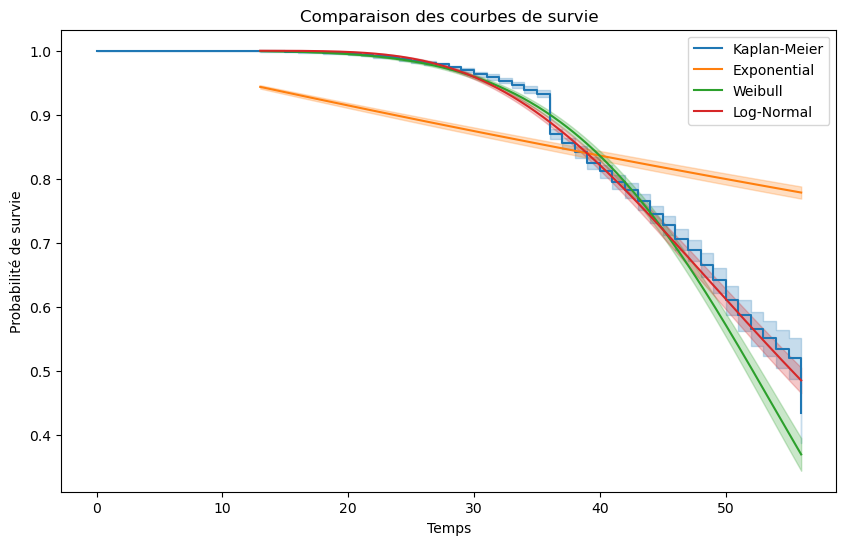

In [284]:
# Comparaison visuelle des courbes de survie des trois modèles

plt.figure(figsize=(10, 6))
# Courbe de survie Kaplan Meier
kmf.plot_survival_function( label='Kaplan-Meier')

# Courbe de survie du modèle exponentiel
exp_fitter.plot_survival_function(label="Exponential")

# Courbe de survie du modèle Weibull
weibull_fitter.plot_survival_function(label="Weibull")

# Courbe de survie du modèle Log-Normal
lognormal_fitter = LogNormalFitter()
lognormal_fitter.fit(T, event_observed=C)
mu_ln = lognormal_fitter.mu_       # Paramètre de localisation
sigma_ln = lognormal_fitter.sigma_  # Paramètre d'échelle

lognormal_fitter.plot_survival_function(label="Log-Normal")

plt.title('Comparaison des courbes de survie')
plt.xlabel('Temps')
plt.ylabel('Probabilité de survie')
plt.legend()
plt.show()


Le modèle Weibull est clairement le plus adapté pour modéliser la survie dans ce cas, comme le montre l’excellent alignement des quantiles empiriques et théoriques. Les modèles Log-Normal et Exponentiel sont moins performants, le premier étant acceptable mais légèrement moins précis, et le second totalement inadapté.

## 4) Vérification de la validité du modèle 

## 4.1) Comparaison des courbes de survie observées et prédites par le modèle Weibul

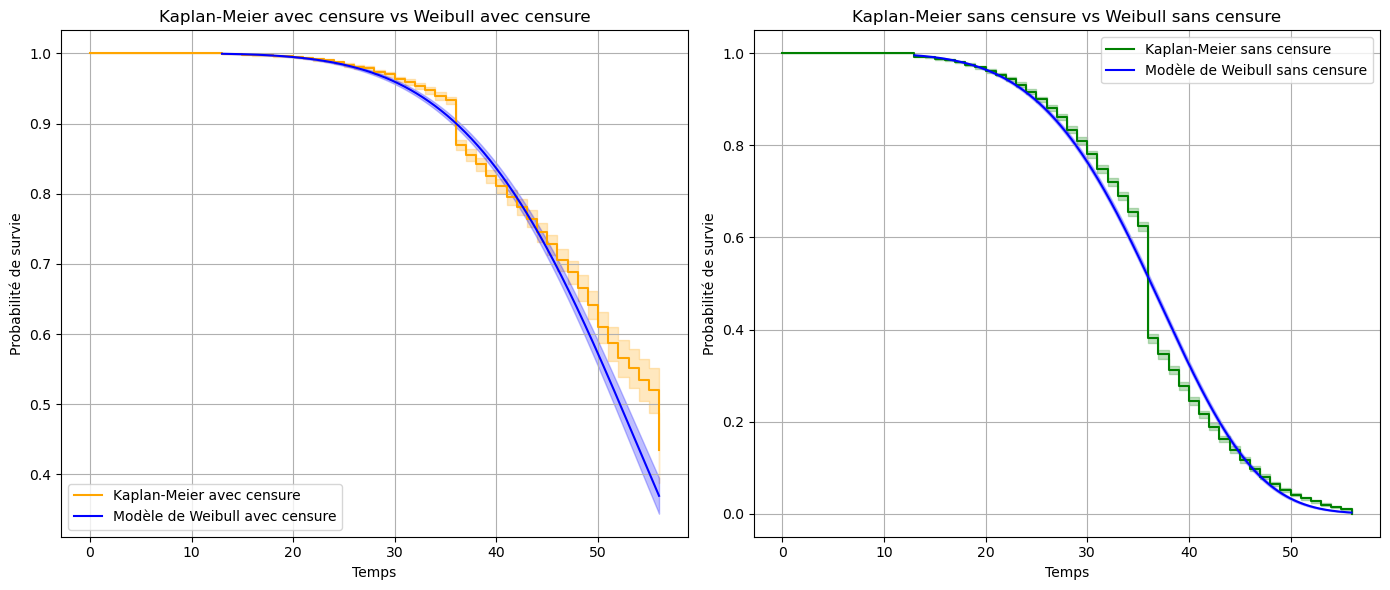

In [289]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, WeibullFitter

# Supposons que T (temps de survie) et C (variable de censure) sont déjà définis

# Ajustement de la courbe Kaplan-Meier avec censure
kmf_with_censorship = KaplanMeierFitter()
kmf_with_censorship.fit(T, event_observed=C, label="Kaplan-Meier avec censure")

# Ajustement de la courbe Kaplan-Meier sans censure (tous les événements sont observés)
kmf_without_censorship = KaplanMeierFitter()
kmf_without_censorship.fit(T, event_observed=[1]*len(C), label="Kaplan-Meier sans censure")

# Ajustement du modèle Weibull avec censure
weibull_fitter_with_censorship = WeibullFitter()
weibull_fitter_with_censorship.fit(T, event_observed=C)

# Ajustement du modèle Weibull sans censure (tous les événements sont observés)
weibull_fitter_without_censorship = WeibullFitter()
weibull_fitter_without_censorship.fit(T, event_observed=[1]*len(C))

# Création de la figure avec une disposition en 1 ligne et 2 colonnes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Graphique de Kaplan-Meier avec censure vs Weibull avec censure
kmf_with_censorship.plot_survival_function(ax=axes[0], color="orange")
weibull_fitter_with_censorship.plot_survival_function(ax=axes[0], label="Modèle de Weibull avec censure", color="blue")
axes[0].set_title("Kaplan-Meier avec censure vs Weibull avec censure")
axes[0].set_xlabel("Temps")
axes[0].set_ylabel("Probabilité de survie")
axes[0].legend()
axes[0].grid(True)

# Graphique de Kaplan-Meier sans censure vs Weibull sans censure
kmf_without_censorship.plot_survival_function(ax=axes[1], color="green")
weibull_fitter_without_censorship.plot_survival_function(ax=axes[1], label="Modèle de Weibull sans censure", color="blue")
axes[1].set_title("Kaplan-Meier sans censure vs Weibull sans censure")
axes[1].set_xlabel("Temps")
axes[1].set_ylabel("Probabilité de survie")
axes[1].legend()
axes[1].grid(True)

# Affichage des graphiques
plt.tight_layout()
plt.show()


Le modèle de Weibul ne correspond pas parfaitement a la fonction de survie obtenue avec Kaplan Meier.

# VI) Modèle de Cox

Le modèle de Cox est un modèle semi-paramétrique qui utilise la méthode du maximum de vraisemblance partielle. Il permet de modéliser la fonction de risque en fonction d'un ou plusieurs covariables. Ce modèle est souvent utilisé dans le cadre de l'analyse de survie.

## Régression et interprétation

En régression logistique, la fonction logit est définie par :
$$
\dfrac{P(Y=1)}{P(Y=0)} = \log\left(\dfrac{P(Y=1)}{1-P(Y=1)}\right) = \text{logit}(P(Y=1))
$$

### Formulation du modèle de Cox

- Soit \( Z \) une variable binaire représentant deux groupes :
  $$
  Z = 
  \begin{cases} 
      1 & \text{groupe A} \\
      0 & \text{groupe B}
  \end{cases}
  $$

- La fonction de risque du modèle de Cox s’écrit :
  $$
  h(t) = h_0(t) \times e^{\beta Z}
  $$

  où \( h_0(t) \) est le risque de base (fonction de risque lorsque \( Z = 0 \)) et \( \beta \) est le paramètre estimé pour la variable \( Z \).

### Hazard Ratio (HR)

L'Hazard Ratio (HR) est défini comme le rapport des risques pour les deux groupes :

$$
HR = \frac{h(t \mid Z=1)}{h(t \mid Z=0)} = e^\beta
$$

### Interprétation de $HR$

- $\beta = 0 \quad \Longleftrightarrow \quad HR = 1 \quad \Longleftrightarrow \quad \text{risques égaux pour les deux groupes}$
- $\beta > 0 \quad \Longleftrightarrow \quad HR > 1 \quad \Longleftrightarrow \quad \text{risque plus élevé dans le groupe A (de $e^\beta$)}$
- $\beta < 0 \quad \Longleftrightarrow \quad HR < 1 \quad \Longleftrightarrow \quad \text{risque moins élevé dans le groupe A (de $e^\beta$)}$

## 1) Proportional_hazard_test sur la variable Sexe_Client:

Le test **`proportional_hazard_test`** est utilisé pour vérifier si les covariables respectent l'hypothèse des risques proportionnels dans le modèle de Cox. Cette hypothèse est cruciale, car elle suppose que les effets des covariables sur le risque sont constants dans le temps. Si une variable ne respecte pas cette hypothèse, elle pourrait introduire un biais dans l'analyse. Ce test permet ainsi de valider la pertinence et la stabilité des variables incluses dans le modèle.


| **Hypothèse**             | **Signification**                          | **Limite de p-value** |
|----------------------------|-----------------------------------------------|----------------------|
| **\( H0 \) :** Pas de relation ou d'effet. | Les variables étudiées n'ont aucun effet significatif. | \( p > 0.05 \) |
| **\( H1 \) :** Présence d'une relation ou d'effet. | Les variables étudiées ont un effet significatif. | \( p < 0.05 \)
:

### 1.1) Test graphique de la fonction de survie

<Axes: >

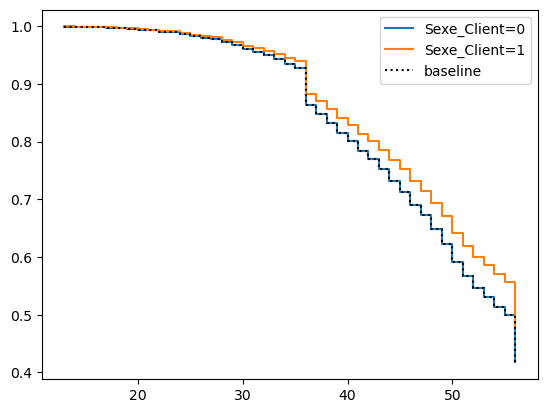

In [294]:
# 4. Vérification des hypothèses
# 4.1 Test graphique
# Importation des bibliothèques
from lifelines import CoxPHFitter
from lifelines.statistics import proportional_hazard_test

# 3.1 Spécification du modèle
# Préparer les données avec les variables pertinentes
df_cph = df[['Anciennete_Client', 'Censure', 'Sexe_Client']].copy()

# 3.2 Ajustement du modèle
cph = CoxPHFitter()
cph.fit(df_cph, duration_col='Anciennete_Client', event_col='Censure')
cph.plot_partial_effects_on_outcome(covariates='Sexe_Client', values=[0, 1], plot_baseline=True)



### 1.2) Test graphique risque cumulé

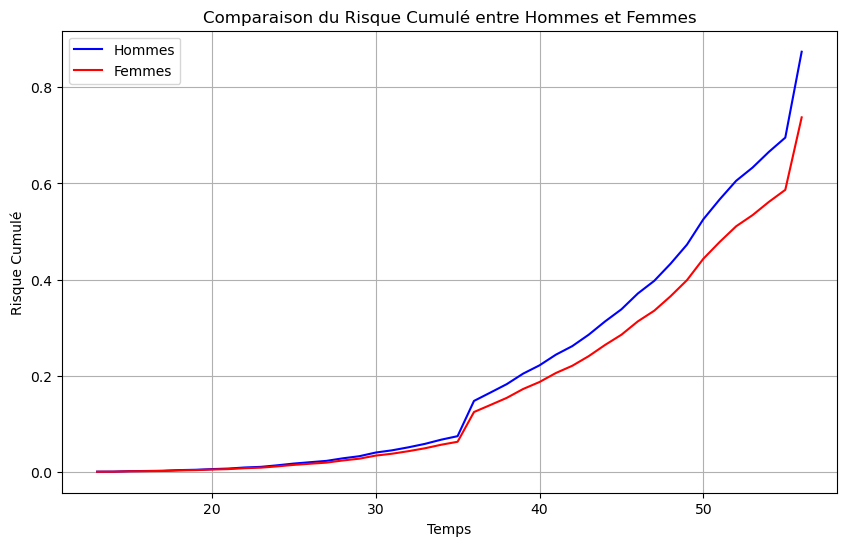

In [297]:
# Importation des bibliothèques nécessaires
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

# 3.1 Spécification du modèle
# Préparer les données avec les variables pertinentes
df_cph = df[['Anciennete_Client', 'Censure', 'Sexe_Client']].copy()

# 3.2 Ajustement du modèle
cph = CoxPHFitter()
cph.fit(df_cph, duration_col='Anciennete_Client', event_col='Censure')

# 4. Vérification des hypothèses : Risque cumulé
# Prévoir le risque cumulé pour les clients masculins (Sexe_Client = 0) et féminins (Sexe_Client = 1)
df_masculin = df_cph[df_cph['Sexe_Client'] == 0]
df_feminin = df_cph[df_cph['Sexe_Client'] == 1]

# Prédiction du risque cumulé pour chaque groupe
cumulative_hazard_masculin = cph.predict_cumulative_hazard(df_masculin)
cumulative_hazard_feminin = cph.predict_cumulative_hazard(df_feminin)

# Tracer les courbes du risque cumulé
plt.figure(figsize=(10, 6))

# Courbe pour les hommes
plt.plot(cumulative_hazard_masculin.index, cumulative_hazard_masculin.mean(axis=1), label='Hommes', color='blue')

# Courbe pour les femmes
plt.plot(cumulative_hazard_feminin.index, cumulative_hazard_feminin.mean(axis=1), label='Femmes', color='red')

# Ajouter des légendes et des titres
plt.title('Comparaison du Risque Cumulé entre Hommes et Femmes')
plt.xlabel('Temps')
plt.ylabel('Risque Cumulé')
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()


### 1.3) Test Log-Rank

**Formulation Mathématique pour 2 groupes**

La statistique de test est définie par :

$$ 
Z_i = \frac{\sum^{J}_{j=1} (O_{ij} - E_{ij})^2}{\sqrt{\sum^{J}_{j=1} V_{ij}}}, \,\,\, i = 1, 2
$$

*   $O_{ij}$ le nombre d'événements observés dans le groupe $i$ au moment $j$

Sous $H_O$, $O_{ij}$ suit une distribution hypergéométrique de paramètres $N_j$, $N_{ij}$, $O_j$ et dont l'espérance et la variance sont :
  
   $E_{ij} = N_{i,j} \frac{O_j}{N_j}$ et   $V_{ij} = E_{ij}(\frac{N_j - O_j}{N_j}) (\frac{N_j - N_{ij}}{N_j - }) $


On peut généraliser ce test à  $n$ groupes.

$$ H_0 : h_1(t) =h_2(t)= ... = h_n(t) \,\, \,\, vs  \,\, \,\,  H_1: \,\, il \,\, existe \,\, au \,\,moins \,\, un \,\, groupe \,\, qui \,\,diffère \,\, des \,\, autres $$

In [300]:
# Importation des bibliothèques nécessaires
from lifelines.statistics import logrank_test

# 3.1 Préparer les données
# Supposez que Sexe_Client = 0 pour les hommes et 1 pour les femmes
group_men = df[df['Sexe_Client'] == 0]
group_women = df[df['Sexe_Client'] == 1]

# 3.2 Test de log-rank
# Le test nécessite les colonnes de durée et d'événement (censure)
results = logrank_test(
    group_men['Anciennete_Client'], group_women['Anciennete_Client'],
    event_observed_A=group_men['Censure'], event_observed_B=group_women['Censure']
)

# 3.3 Affichage des résultats
print("Test de log-rank entre hommes et femmes")
print(f"p-value: {results.p_value}")
print(f"Statistique du test: {results.test_statistic}")

# Interprétation basée sur la p-value
if results.p_value < 0.05:
    print("Il y a une différence significative entre les courbes de survie des hommes et des femmes.")
else:
    print("Aucune différence significative entre les courbes de survie des hommes et des femmes.")


Test de log-rank entre hommes et femmes
p-value: 0.0007569390005867569
Statistique du test: 11.343956229540883
Il y a une différence significative entre les courbes de survie des hommes et des femmes.


Il y a une différence significative entre les courbes de survie des hommes et des femmes d'après le test de log-rank.

## 2) Ajustement du modèle

In [304]:
# 3.2 Ajustement du modèle
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 10127 total observations, 8500 right-censored observations>
             duration col = 'Anciennete_Client'
                event col = 'Censure'
      baseline estimation = breslow
   number of observations = 10127
number of events observed = 1627
   partial log-likelihood = -13490.50
         time fit was run = 2025-01-18 21:10:52 UTC

---
             coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                    
Sexe_Client -0.17      0.84      0.05           -0.27           -0.07                0.76                0.93

             cmp to     z      p  -log2(p)
covariate                                 
Sexe_Client    0.00 -3.39 <0.005     10.48
---
Concordance = 0.52
Partial AIC = 26982.99
log-likelihood ratio test = 11.57 on 1 df
-log2(p) of ll-ratio test = 10.54

## 3) Vérification des hypothèses


### 3.1) Tests statistiques

In [308]:
# 4.2 Test statistique
results = proportional_hazard_test(cph, df_cph, time_transform="rank")
print(results.summary)

# 5. Interprétation des résultats
# Les coefficients β et HR sont inclus dans le résumé
# Les variables significatives (p-value < 0.05) sont à noter

             test_statistic         p  -log2(p)
Sexe_Client        0.000252  0.987326  0.018402


### 3.2) Comparaison des modèles avec et sans covariables

Comparaison des critères AIC et BIC

In [311]:
# Critères AIC et log-vraisemblance pour Cox
AIC_cox = cph.AIC_partial_
log_likelihood_cox = cph.log_likelihood_
print(f"AIC Cox: {AIC_cox}")

# Afficher les critères pour les trois 
print("\nComparaison des modèles :")
print(f"Weibull avec censure : AIC = {AIC_weibull_cens}, BIC = {BIC_weibull_cens}")
print(f"Weibull sans censure : AIC = {AIC_weibull_no_cens}, BIC = {BIC_weibull_no_cens}")
print(f"Cox : AIC = {AIC_cox}")

# Identifier le modèle avec le meilleur AIC

if AIC_weibull_cens < AIC_weibull_no_cens and AIC_weibull_cens < AIC_cox:
    print("Le modèle Weibull avec censure est le meilleur selon l'AIC.")
elif AIC_weibull_no_cens < AIC_weibull_cens and AIC_weibull_no_cens < AIC_cox:
    print("Le modèle Weibull sans censure est le meilleur selon l'AIC.")
else:
    print("Le modèle de Cox est le meilleur selon l'AIC.")

AIC Cox: 26982.994835991834

Comparaison des modèles :
Weibull avec censure : AIC = 17241.53487136317, BIC = 17255.980792169834
Weibull sans censure : AIC = 11329.205390020263, BIC = 11339.994376234701
Cox : AIC = 26982.994835991834
Le modèle Weibull sans censure est le meilleur selon l'AIC.


## Conclusion Modèle Cox

Le modèle de Cox a été ajusté avec **`lifelines.CoxPHFitter`** en utilisant comme durée `'Anciennete_Client'` et comme événement `'Censure'`. L'estimation de la baseline a été réalisée avec la méthode de **Breslow**, et le modèle inclut un total de **10 127 observations**, dont **1 627 événements observés**. Le coefficient associé à la variable **Sexe_Client** est significatif avec une p-value inférieure à **0.005**, indiquant un impact sur la probabilité d'événements. Le score de concordance est de **0.52**, et le test du log-vraisemblance donne une valeur de **11.57** avec un p significatif.


La p-value obtenue pour la variable **Sexe_Client** est très élevée (**p = 0.987**), ce qui indique qu'il n'y a pas de différence statistiquement significative entre les groupes masculins et féminins concernant la variable d'intérêt. Le test statistique montre que l'hypothèse nulle ne peut pas être rejetée. Ainsi, le sexe n'a pas d'impact significatif sur le phénomène étudié.


# Conclusion

L’analyse des comportements de désertion bancaire à travers notre meilleur modèle (Weibull) met en lumière des tendances significatives dans la fidélité des clients au fil du temps. Nous constatons qu’au cours des premiers mois, la probabilité de conserver un client reste élevée, mais elle diminue de façon progressive après une certaine période critique.

Environ la moitié des clients quittent la banque avant le 40ᵉ mois, comme l’indique le point médian de la courbe. Cette observation souligne l’existence d’une fenêtre temporelle clé durant laquelle les actions de fidélisation peuvent être les plus efficaces pour ralentir la désertion.

En fin de période (après 50 mois), la probabilité de survie des clients devient extrêmement faible, confirmant que, sans intervention proactive, une large partie de la clientèle est susceptible de quitter la banque dans un horizon prévisible.